# Tratamiento

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

warnings.filterwarnings("ignore")

## Configuro la visualización de mis datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [131]:
# Ruta de los archivos
ruta_categoricas_visualizacion = './data/variables/lista_categoricas_visualizacion.txt'
ruta_categoricas_definitivo = './data/variables/lista_categoricas_definitivo.txt'
ruta_deleted_variables = './data/variables/deleted_variables.txt'

# Leer las listas desde los archivos
with open(ruta_categoricas_visualizacion, 'r') as f:
    lista_categoricas_visualizacion = [line.strip() for line in f]

with open(ruta_categoricas_definitivo, 'r') as f:
    lista_categoricas_definitivo = [line.strip() for line in f]

with open(ruta_deleted_variables, 'r') as f:
    deleted_variables = [line.strip() for line in f]

# Imprimir las listas para verificar
print("Lista Categoricas Visualizacion:", lista_categoricas_visualizacion)
print("Lista Categoricas Definitivo:", lista_categoricas_definitivo)
print("Deleted Variables:", deleted_variables)




Lista Categoricas Visualizacion: ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CIT

In [132]:
df_loan = pd.read_csv('./data/application_data.csv')

In [133]:
df_loan.dtypes.sort_values().to_frame('tipo').groupby('tipo').size().to_frame('cantidad').reset_index()

tipo  cantidad
0    int64        41
1  float64        65
2   object        16

In [135]:
df_loan = df_loan.drop(columns=deleted_variables, errors='ignore') ## errors= ignore sirve para que si hay columans que no están en el df se siga ejecutando
df_loan.dtypes.sort_values().to_frame('tipo').groupby('tipo').size().to_frame('cantidad').reset_index()

tipo  cantidad
0    int64        41
1  float64        50
2   object        15

# Separación en train y test

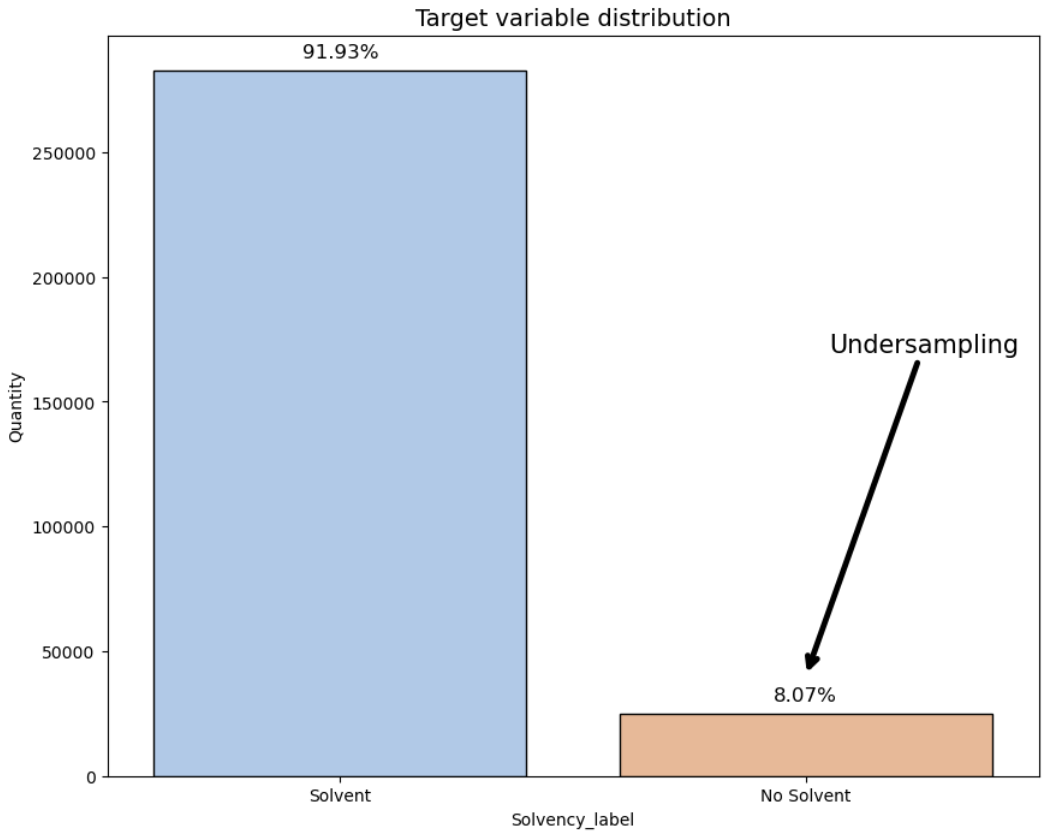

ref: NOTEBOOK: 01_Exploración_general

In [136]:
from sklearn.model_selection import train_test_split

## Como tenemos un dataset con undersampling, vamos aplicar stratify para que la proporción se 
## mantenga
x_train, x_test, y_train, y_test = train_test_split(df_loan.drop('TARGET', axis=1),
                                                    df_loan['TARGET'],
                                                    stratify=df_loan['TARGET'],
                                                    test_size=0.2)

df_loan_train = pd.concat([x_train, y_train], axis=1)
df_loan_test = pd.concat([x_test, y_test], axis=1)

In [137]:
## Comprobación de que se han mantenido las distribuciones 
print('== Train\n', df_loan_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_loan_test['TARGET'].value_counts(normalize=True))
df_loan_train.head()

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
102858      219397         Cash loans           F            N   
151160      275215         Cash loans           M            N   
128625      249198         Cash loans           F            N   
51375       159487         Cash loans           M            N   
254925      394983         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
102858               Y             0          157500.0    659025.0   
151160               Y             0          261000.0   1237032.0   
128625               Y             0          157500.0    350415.0   
51375                N             1          180000.0    269550.0   
254925               Y             0          247500.0   1800000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
102858      36927.0         562500.0   Unaccompanied  Commercial associate   
151160      41013.0        1012500.0   Unaccompanied             Pensioner   
128625      26329.5         292500.0   Unaccompanied             Pensioner   
51375       12001.5         225000.0          Family         State servant   
254925      49630.5        1800000.0          Family  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
102858  Secondary / secondary special            Married  House / apartment   
151160  Secondary / secondary special            Married  House / apartment   
128625  Secondary / secondary special            Married  House / apartment   
51375   Secondary / secondary special     Civil marriage  House / apartment   
254925  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
102858                    0.011703      -17211          -3232   
151160                    0.010032      -22909         365243   
128625                    0.022625      -21827         365243   
51375                     0.004960      -12273          -1151   
254925                    0.046220      -22108         -14648   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
102858            -9639.0             -754          NaN           1   
151160            -7599.0            -4509          NaN           1   
128625            -9513.0            -4175          NaN           1   
51375             -4879.0            -2209          NaN           1   
254925             -108.0            -4396          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
102858               1                0                 1           0   
151160               0                0                 1           0   
128625               0                0                 1           0   
51375                1                0                 1           0   
254925               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
102858           0        Laborers              2.0                     2   
151160           0             NaN              2.0                     2   
128625           0             NaN              2.0                     2   
51375            0             NaN              3.0                     2   
254925           0         Drivers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
102858                            2                    TUESDAY   
151160                            2                     FRIDAY   
128625                            2                     FRIDAY   
51375                             2                    TUESDAY   
254925                            1                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
102858                       14                           0   
151

In [148]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    """
    # Configurar paleta de colores agradable y consistente
    sns.set_palette("Set2")  # Paleta general

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), dpi=90)

    # Contar nulos antes de cualquier transformación
    count_null = df[col_name].isnull().sum()

    if isContinuous:
        # Usar colores consistentes para el histograma
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, color="#5975A4")
    else:
        # Transformar a string para contar bien los NaN
        col_temp = df[col_name].copy()
        col_temp = col_temp.astype('str')  # Convertir todo a string para incluir NaN
        col_temp[df[col_name].isnull()] = 'NaN'  # Reemplazar valores nulos por 'NaN'

        # Usar un color fijo para el countplot
        sns.countplot(col_temp, order=sorted(col_temp.unique()), color="#8DC9A3", saturation=1, ax=ax1)

    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(f"{col_name} - Número de nulos: {count_null}")
    plt.xticks(rotation=90)

    if isContinuous:
        data_no_na = df[[col_name, target]].dropna()  # Excluye filas con NaN en las columnas relevantes
        # Usar una paleta agradable para el boxplot
        sns.boxplot(x=target, y=col_name, data=data_no_na, ax=ax2, palette="coolwarm")

        ax2.set_ylabel('')
        ax2.set_title(f"{col_name} by {target}")
    else:
        data = df.groupby(col_temp)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [col_name, target, 'proportion']
        # Usar colores consistentes para el barplot
        sns.barplot(x=col_name, y='proportion', hue=target, data=data, saturation=1, ax=ax2, palette="husl")
        ax2.set_ylabel(f"{target} fraction")
        ax2.set_title(target)
        plt.xticks(rotation=90)
    ax2.set_xlabel(col_name)

    plt.tight_layout()


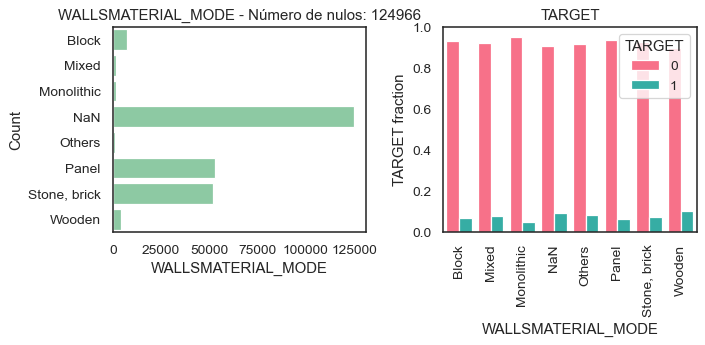

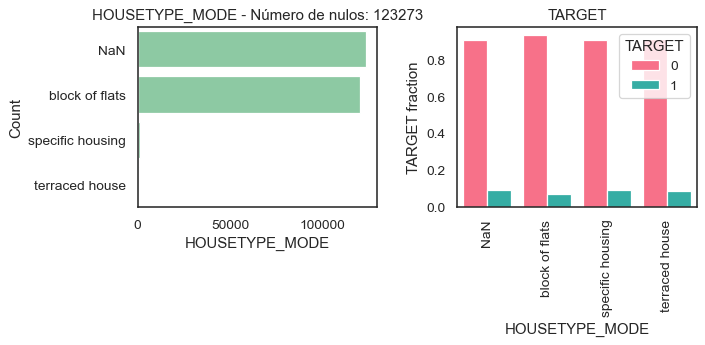

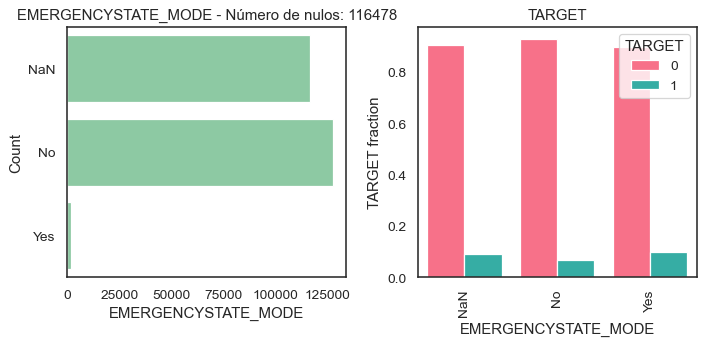

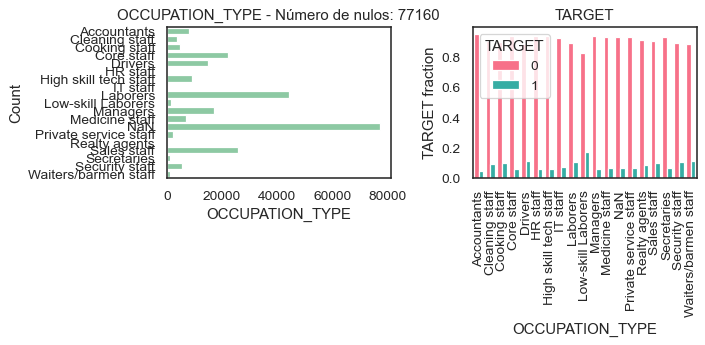

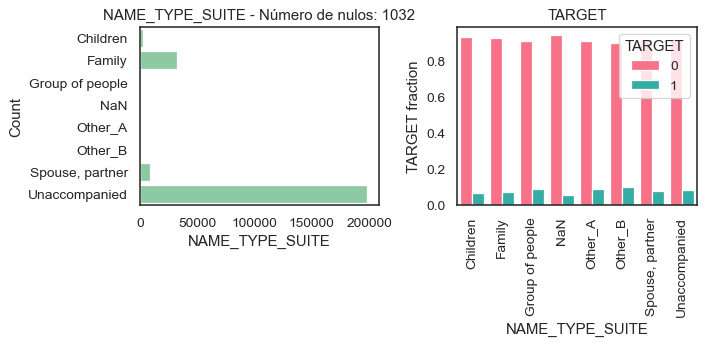

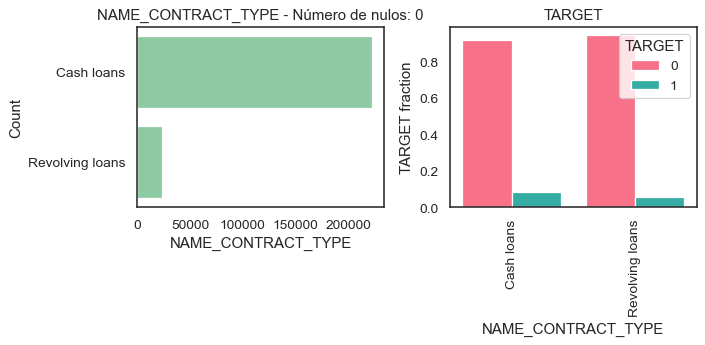

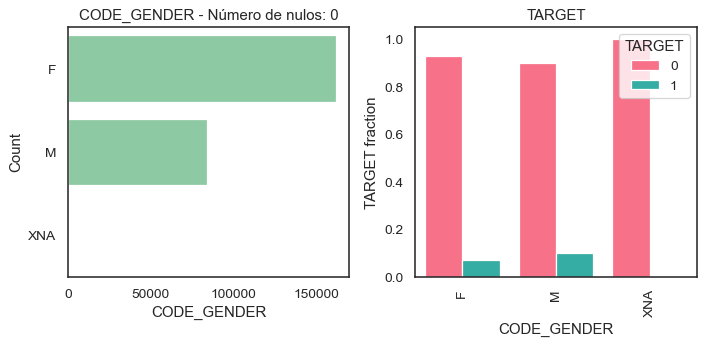

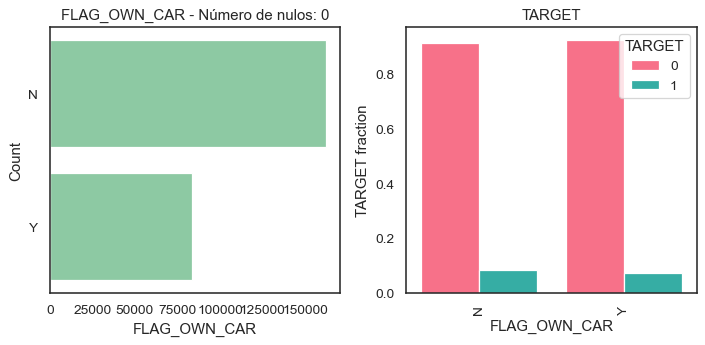

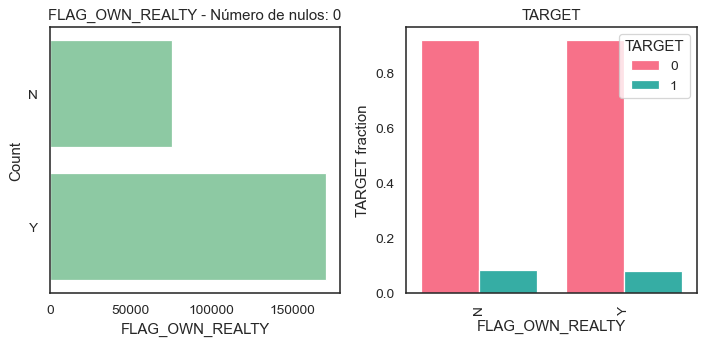

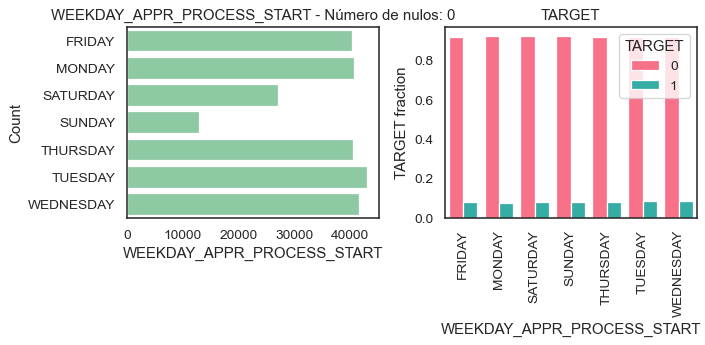

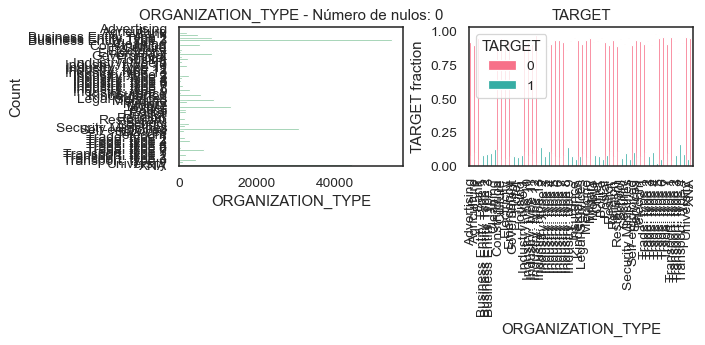

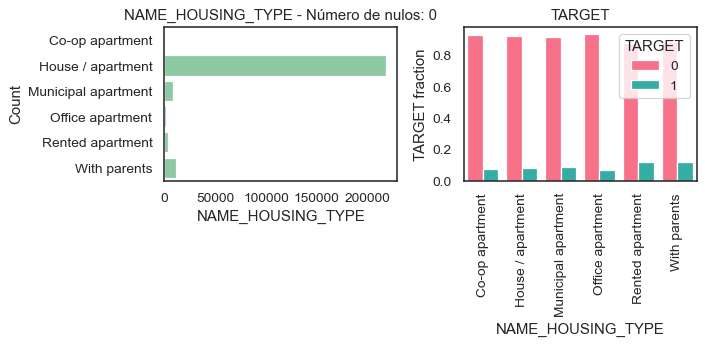

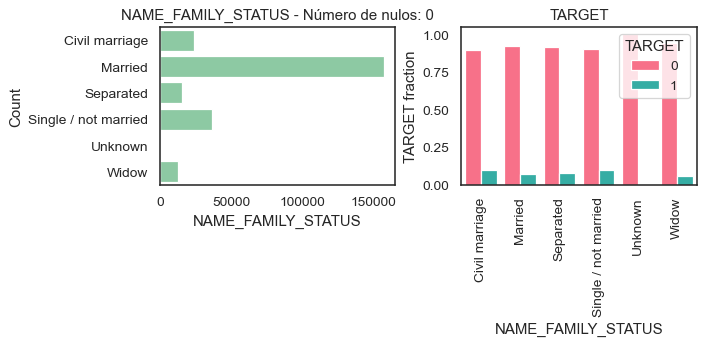

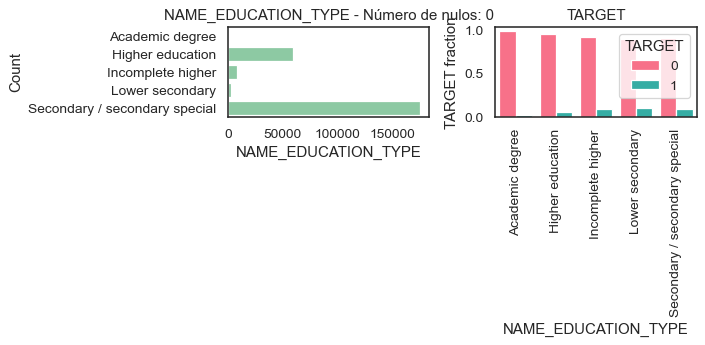

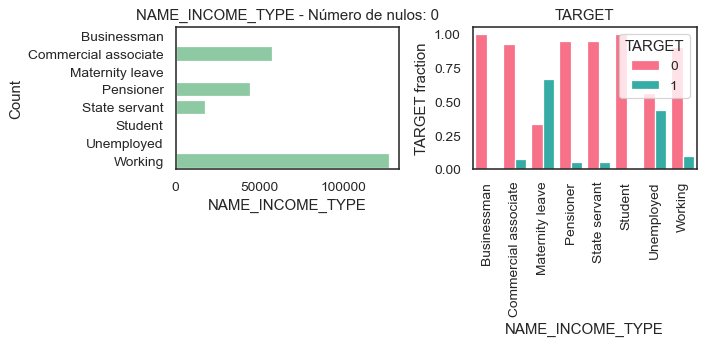

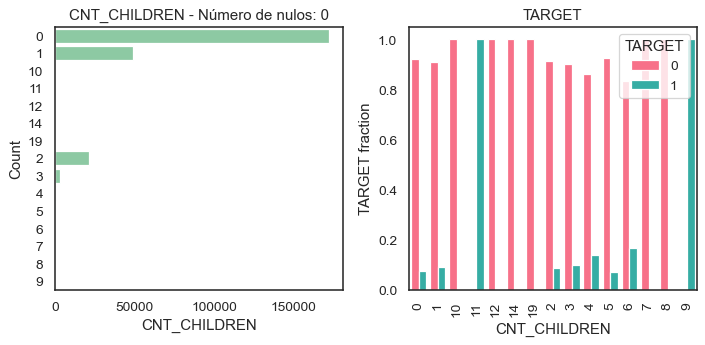

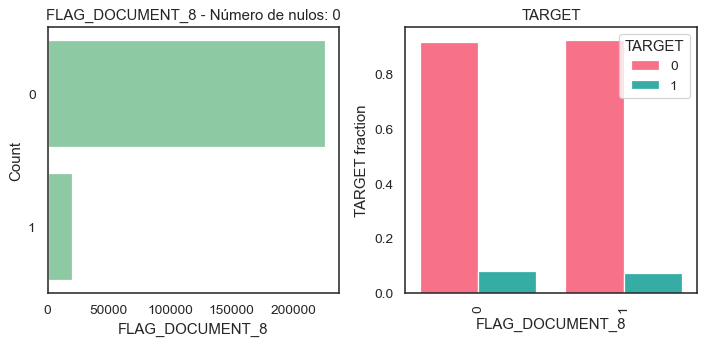

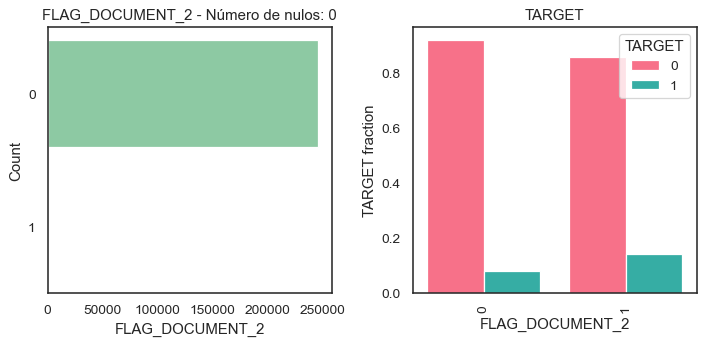

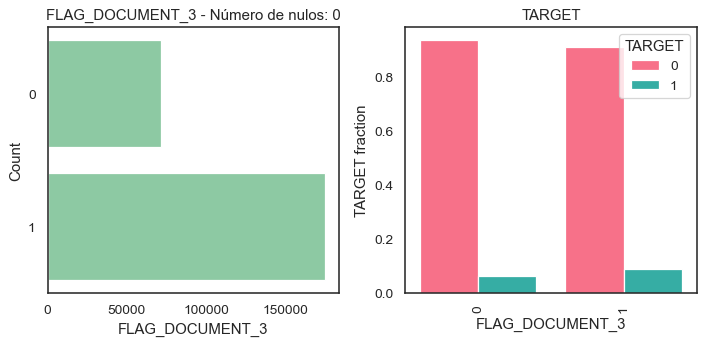

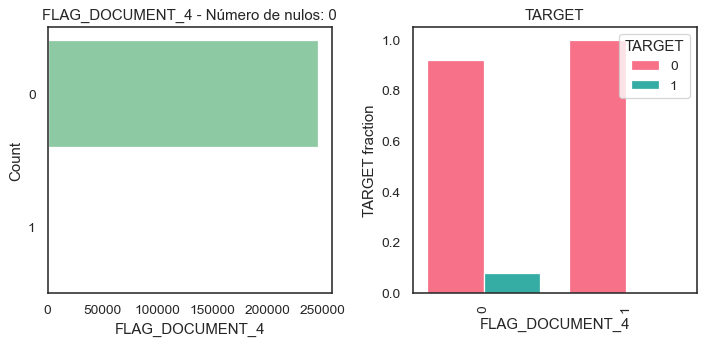

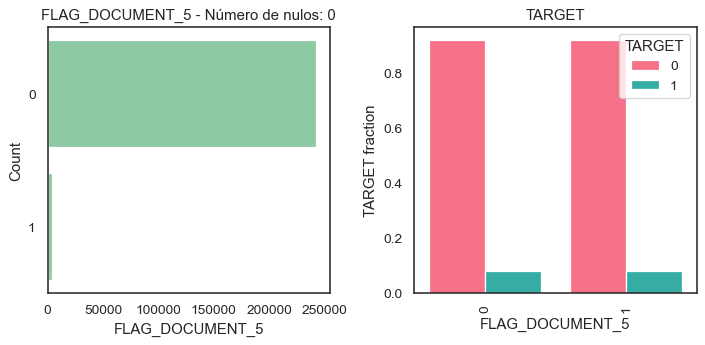

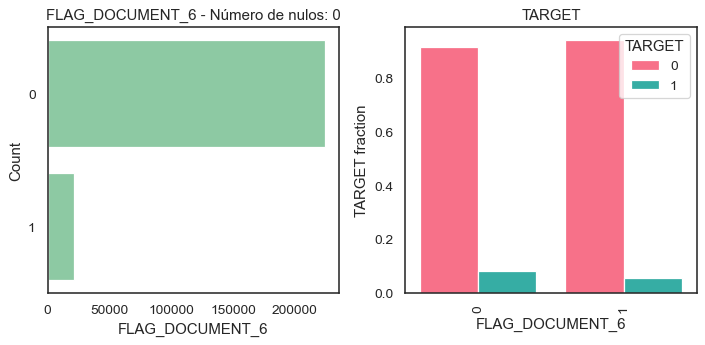

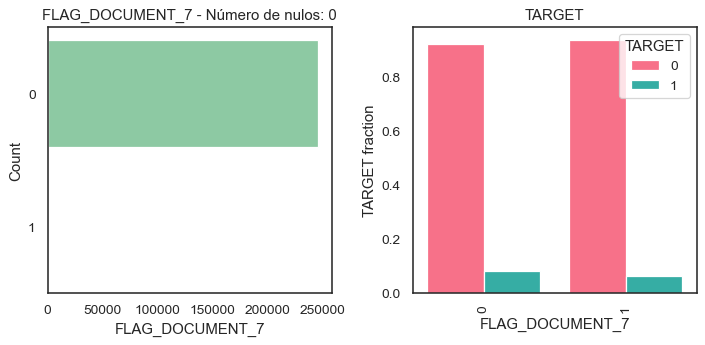

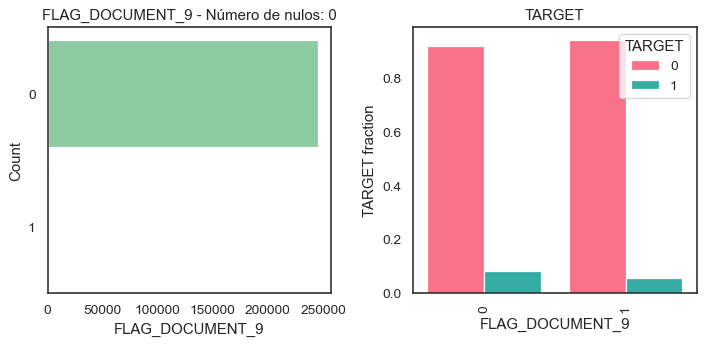

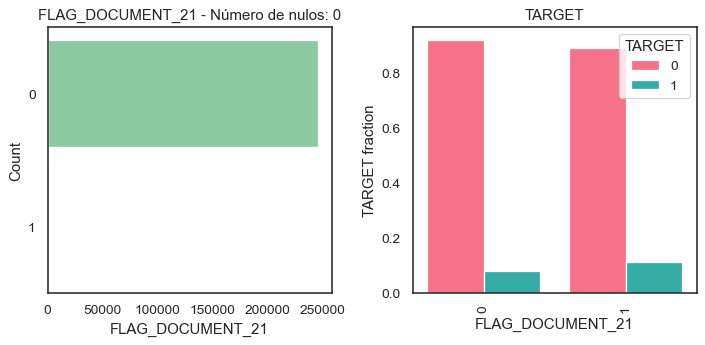

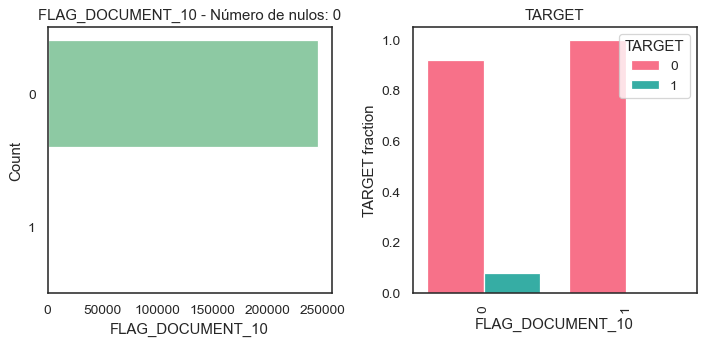

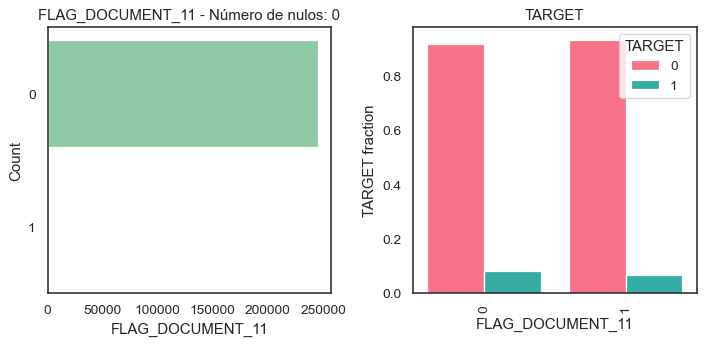

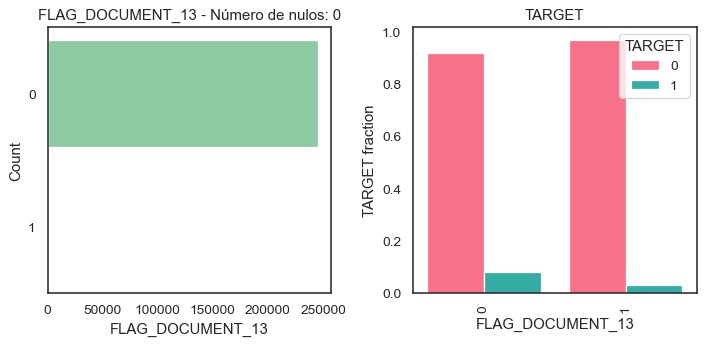

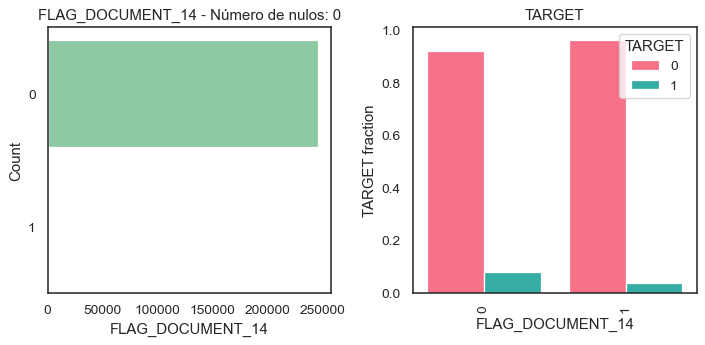

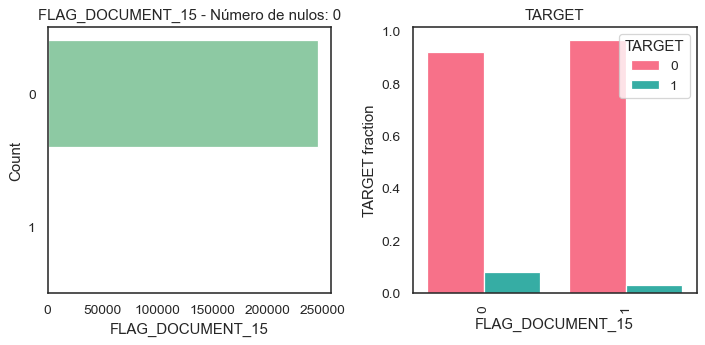

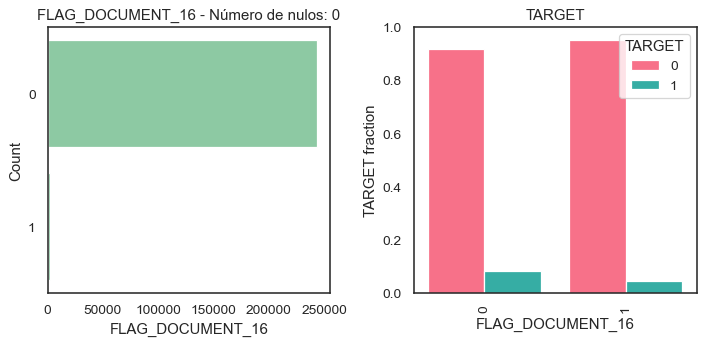

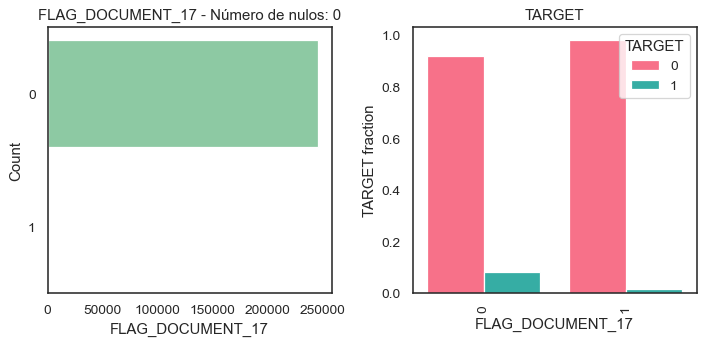

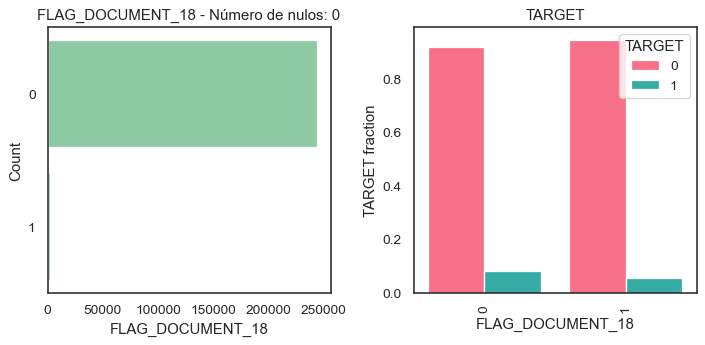

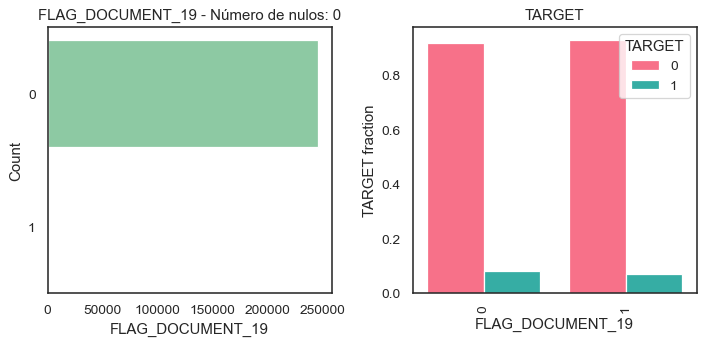

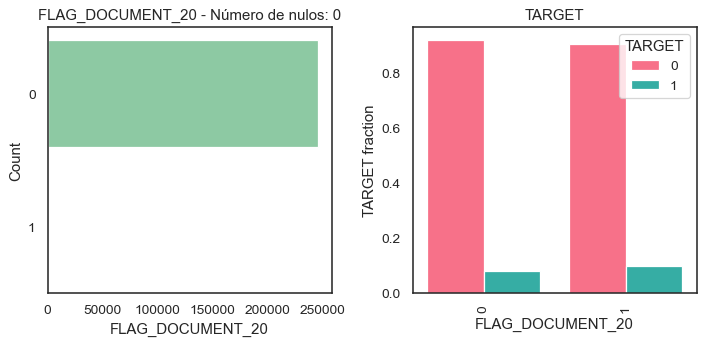

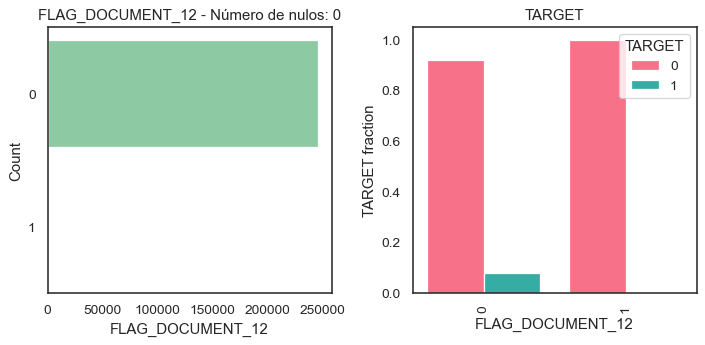

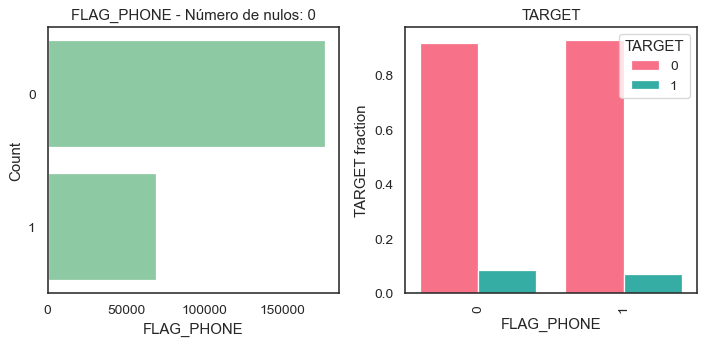

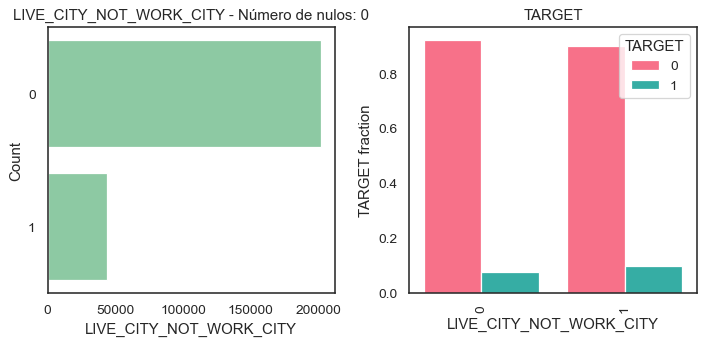

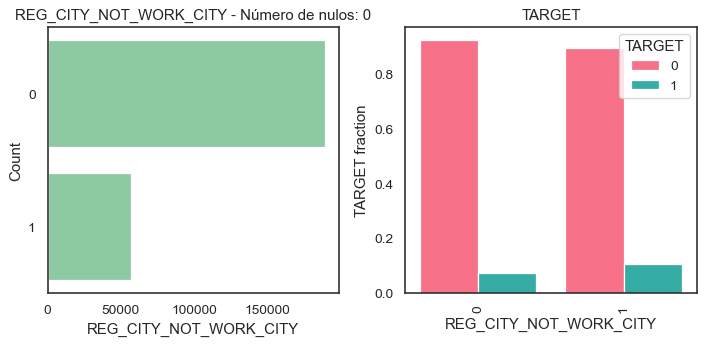

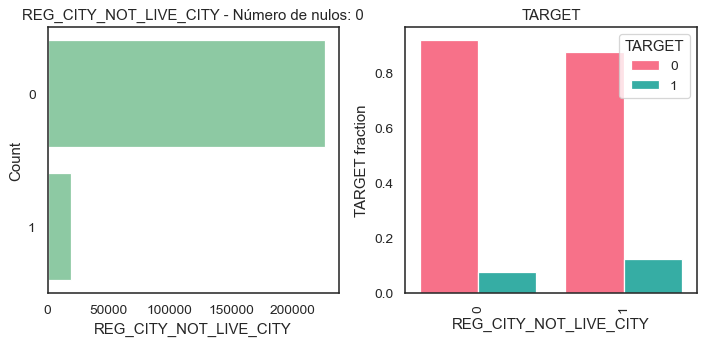

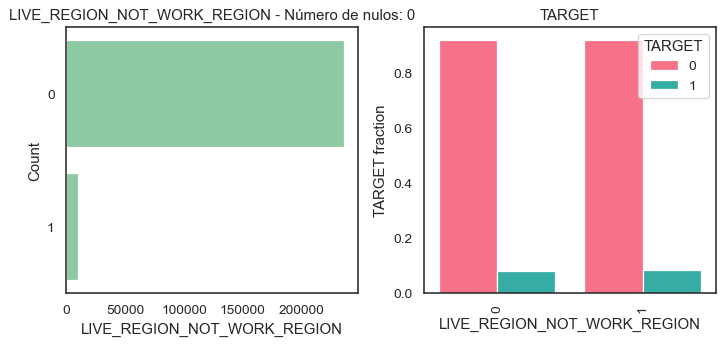

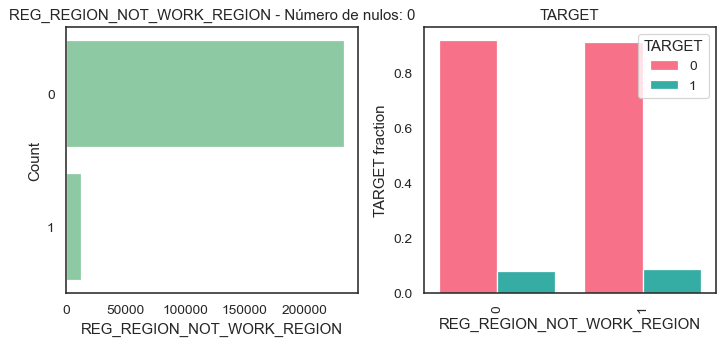

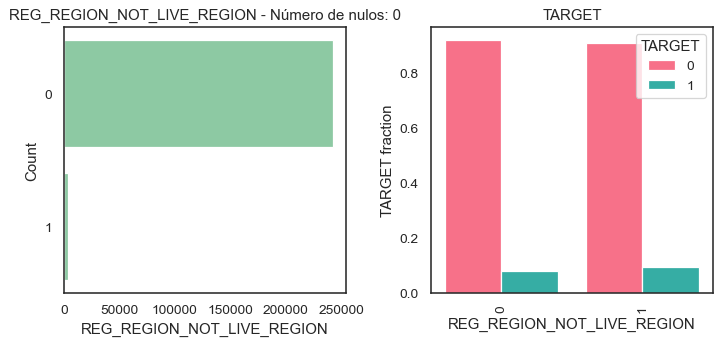

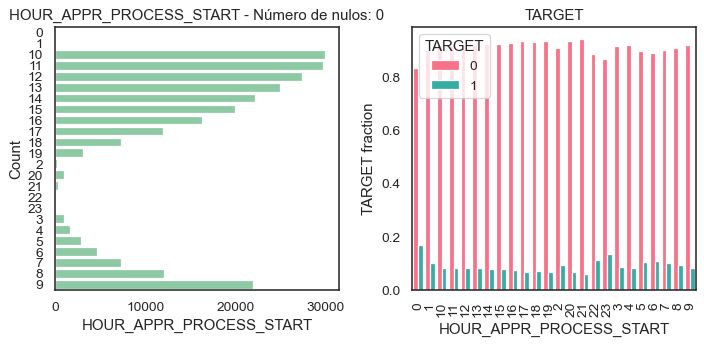

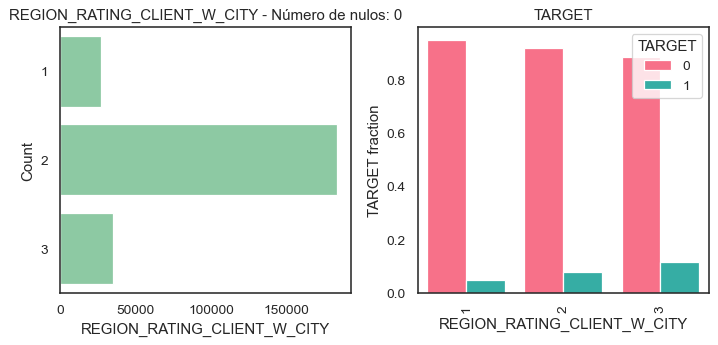

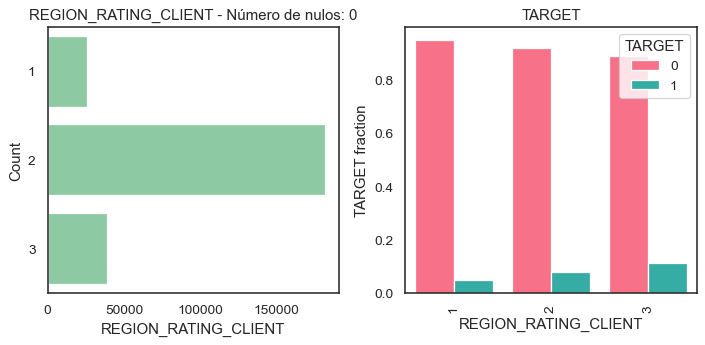

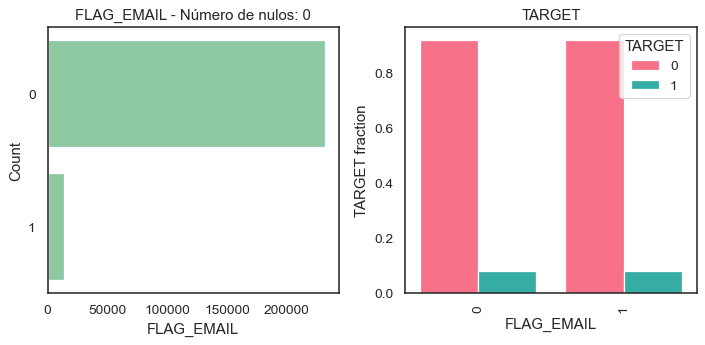

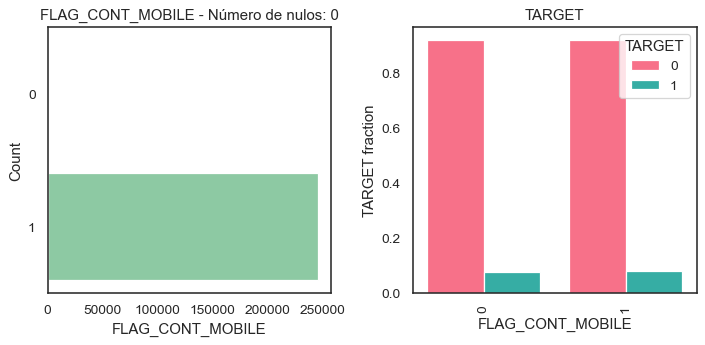

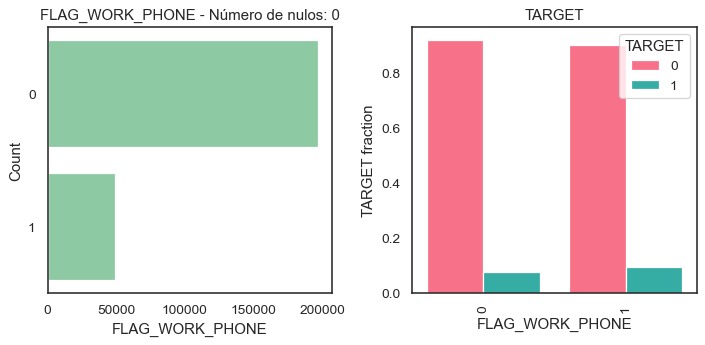

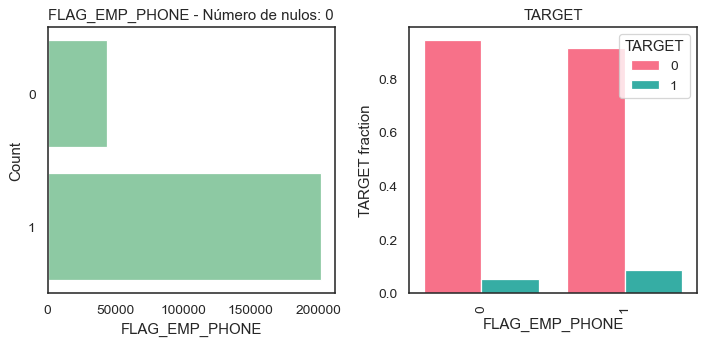

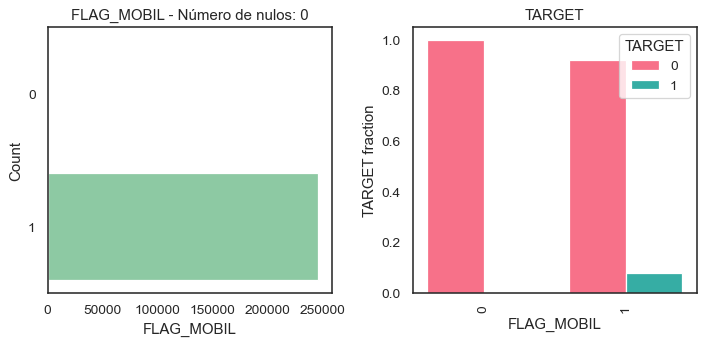

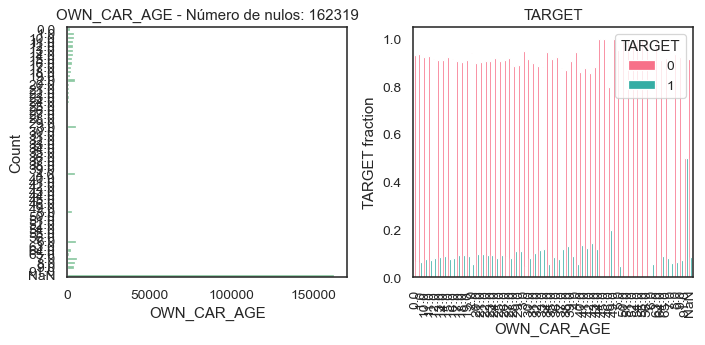

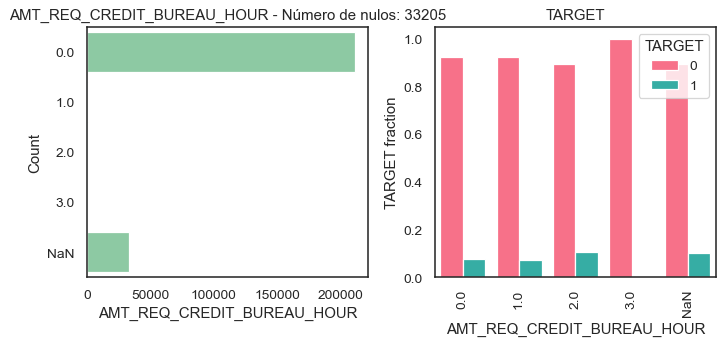

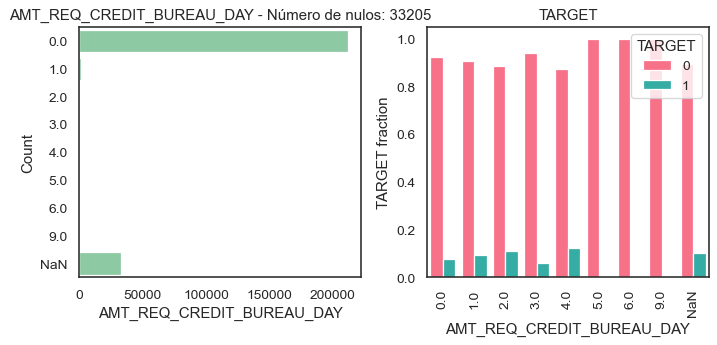

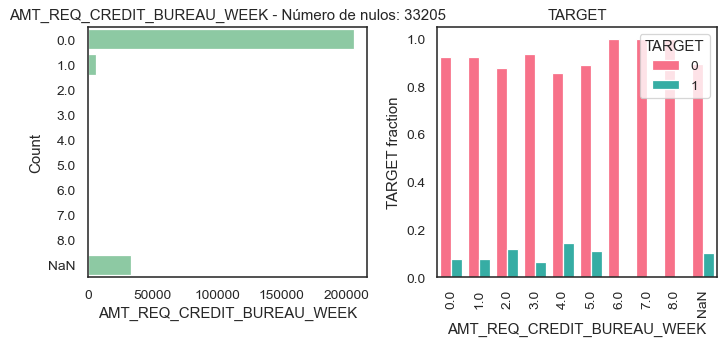

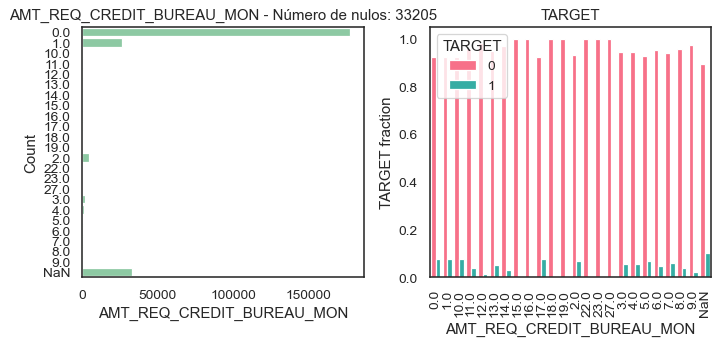

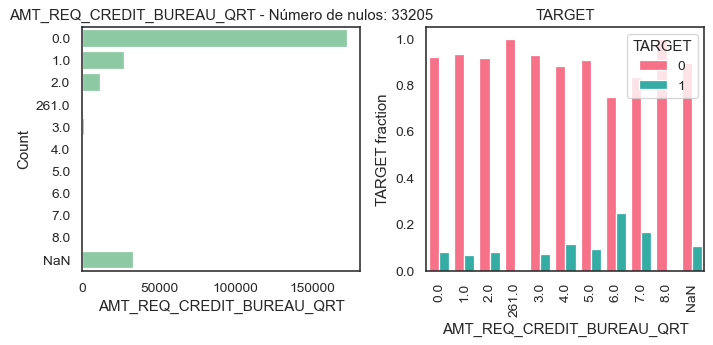

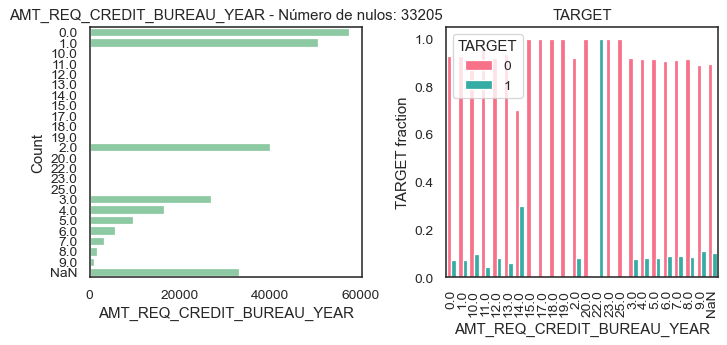

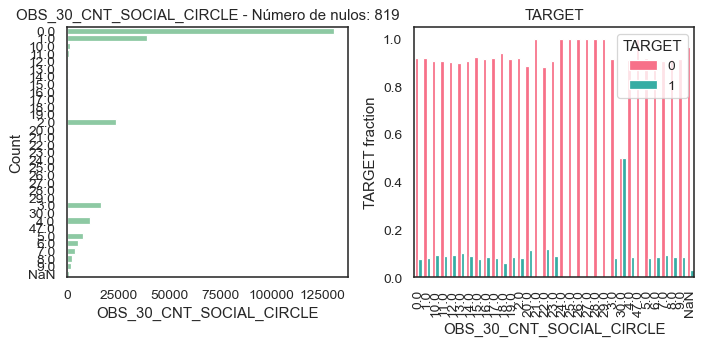

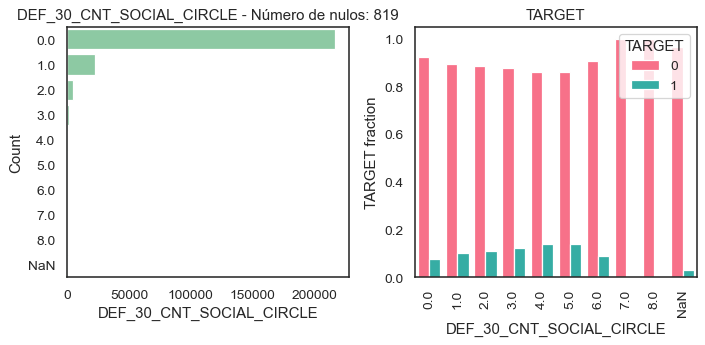

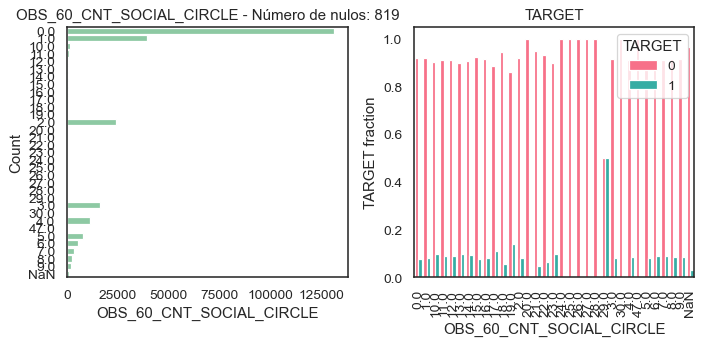

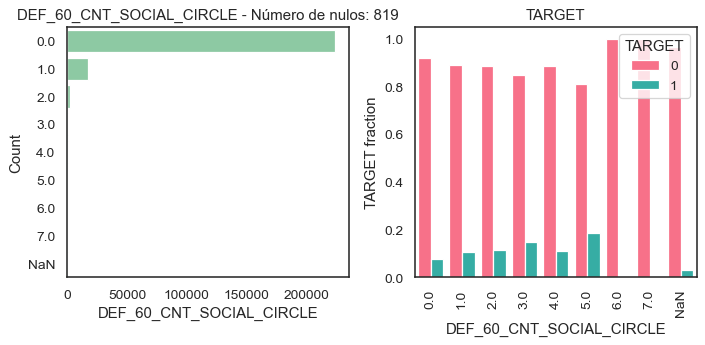

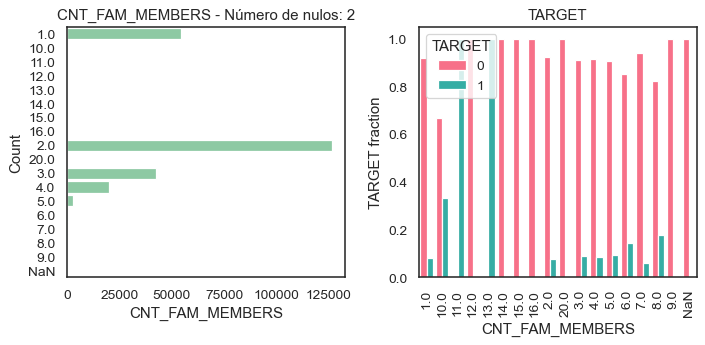

In [149]:
# Ejemplo de uso en el bucle
for i in lista_categoricas_visualizacion:
    if i != 'TARGET':
        plot_feature(df_loan_train, col_name=i, isContinuous=False, target='TARGET')
    
    plt.show()  ## para que según se van generando vayan apareciendo


In [154]:
columnas_continuas = [col for col in df_loan_train.columns if col not in lista_categoricas_visualizacion]
columnas_continuas

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'DAYS_LAST_PHONE_CHANGE']

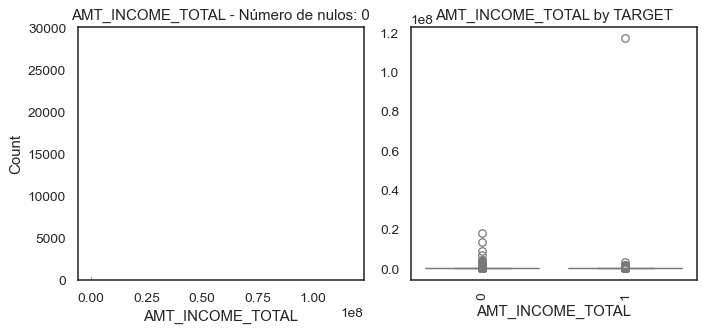

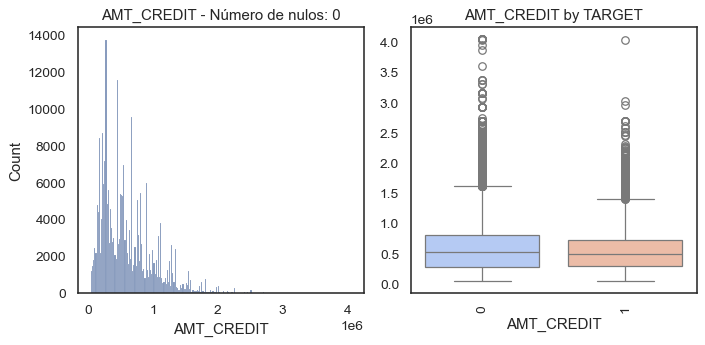

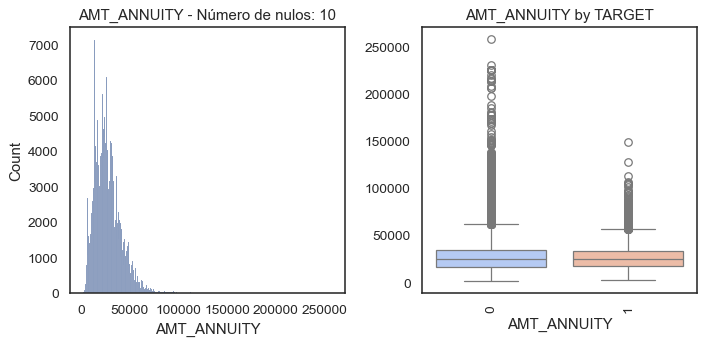

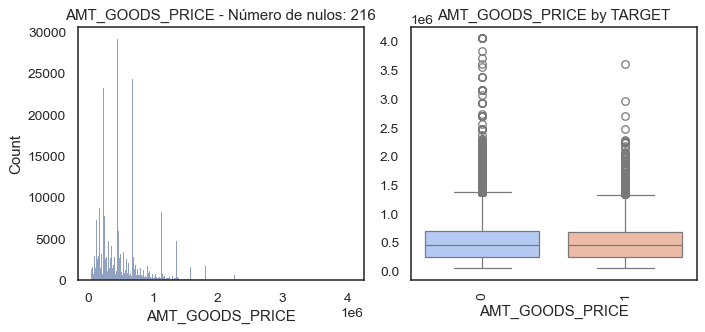

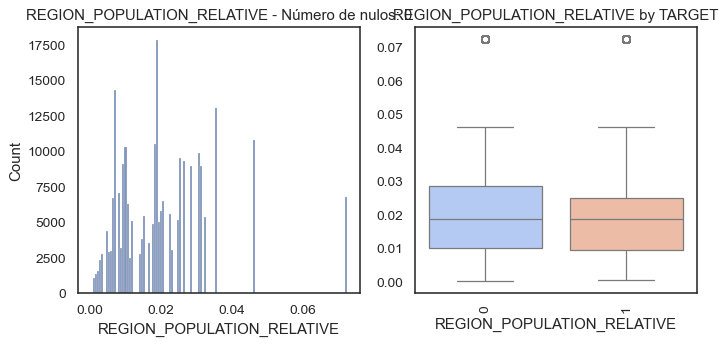

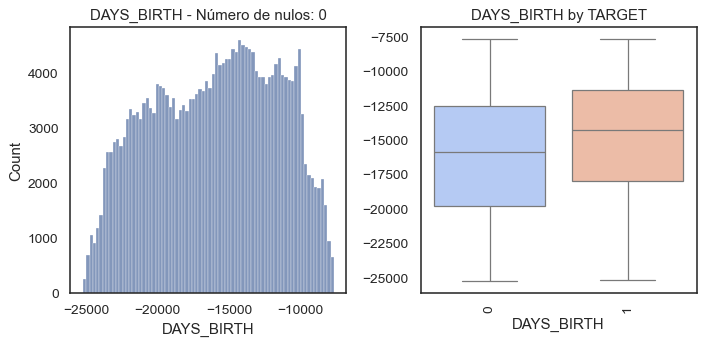

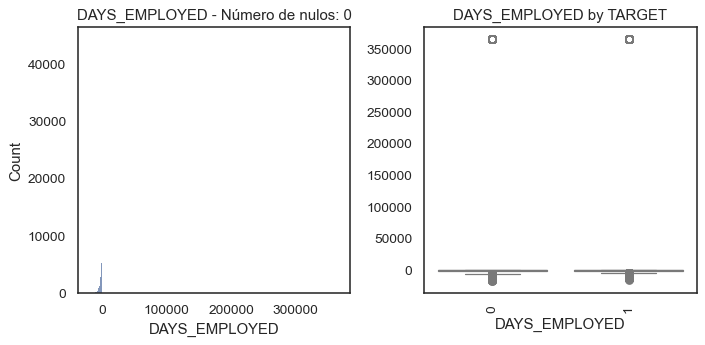

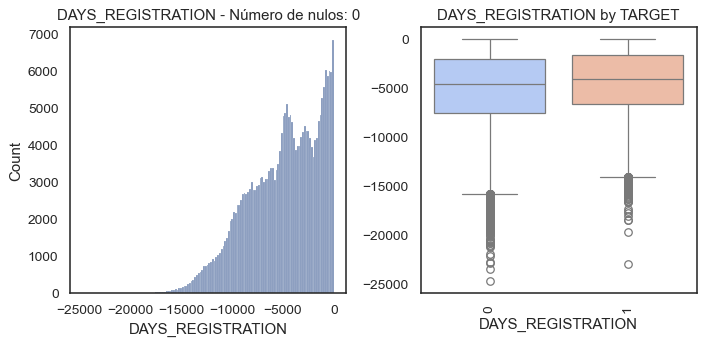

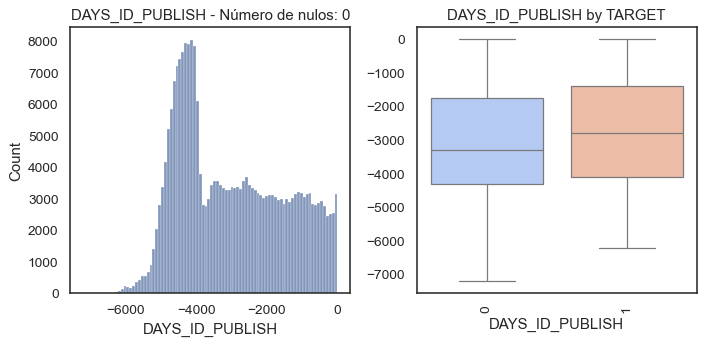

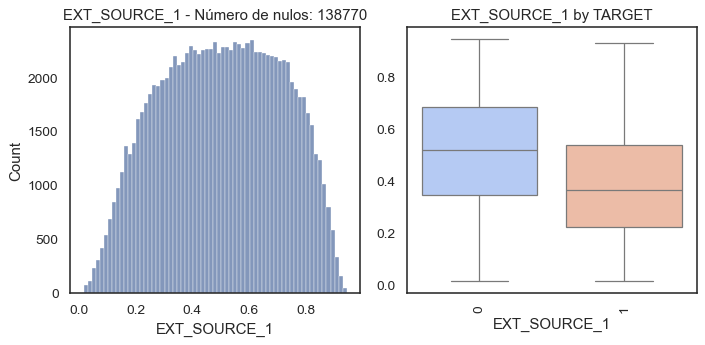

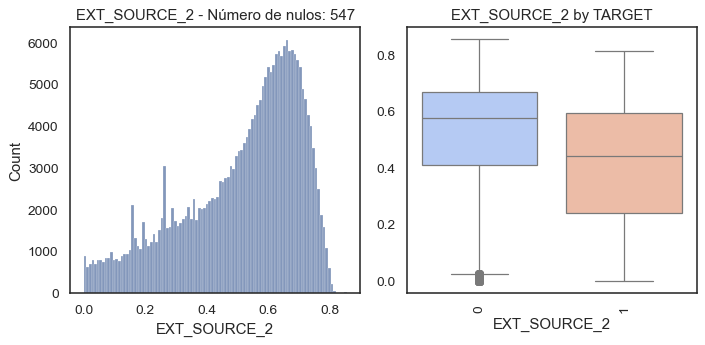

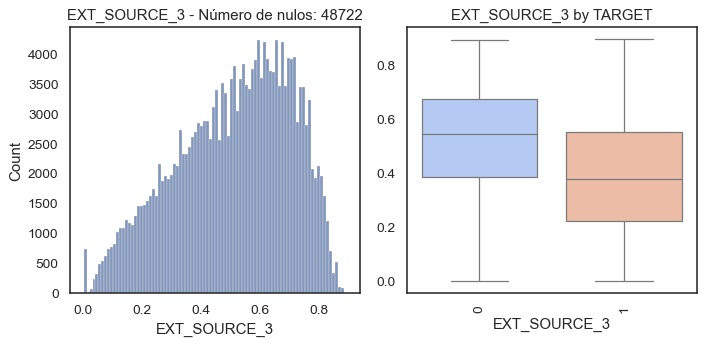

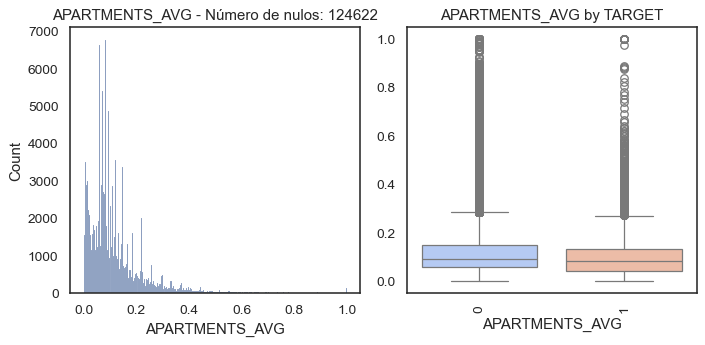

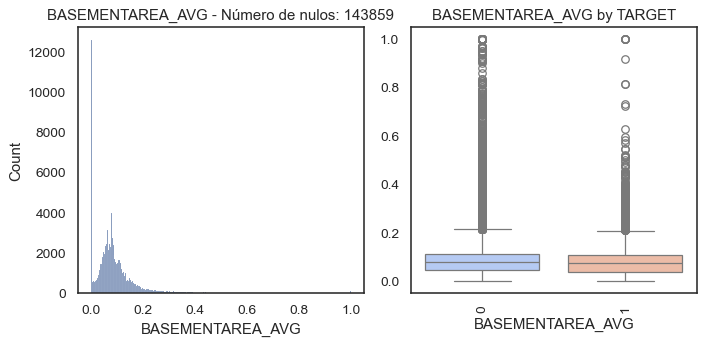

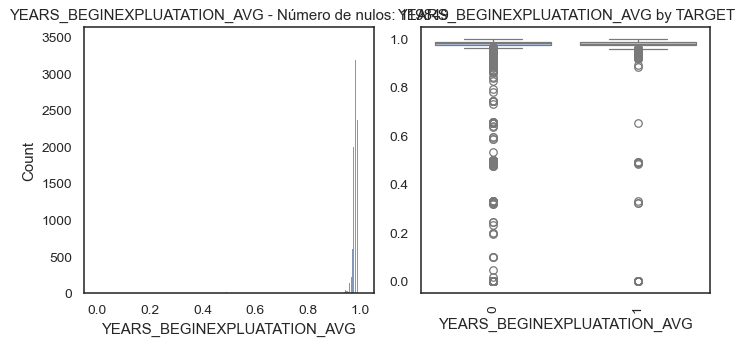

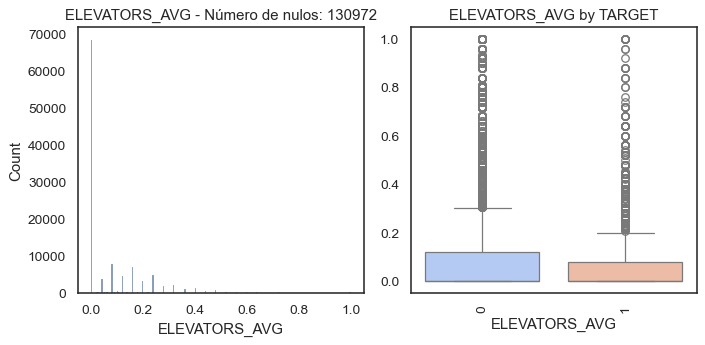

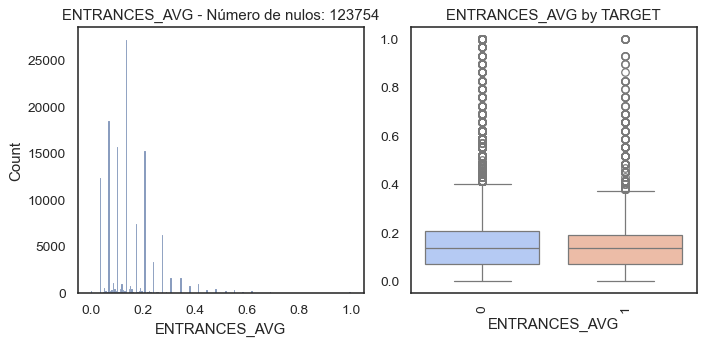

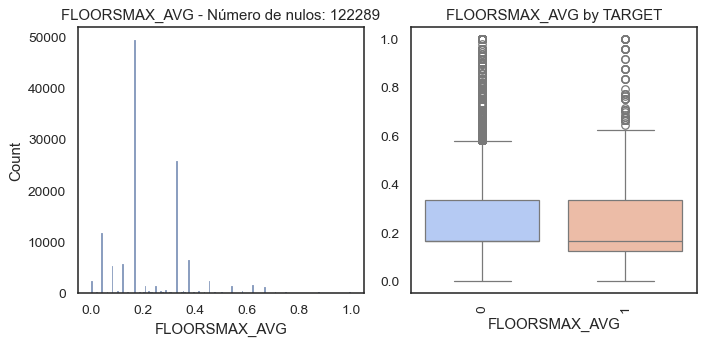

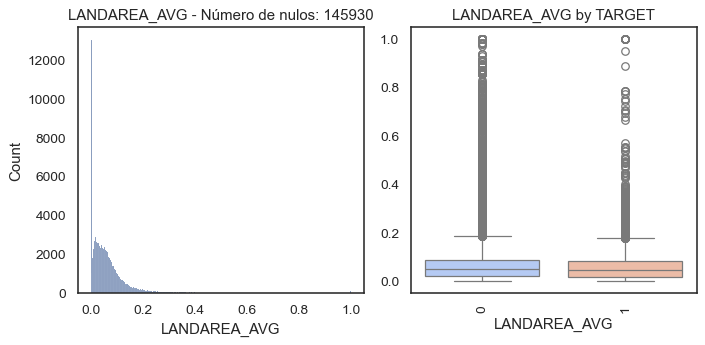

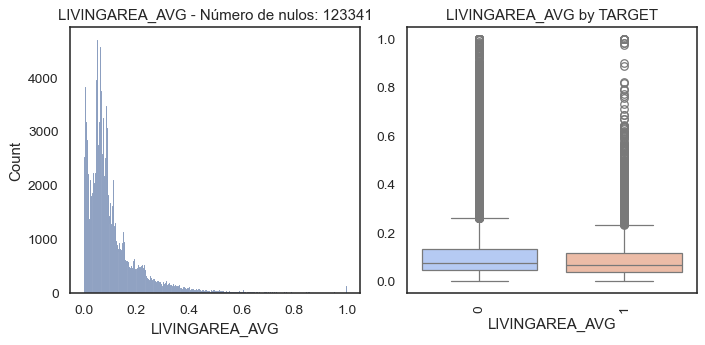

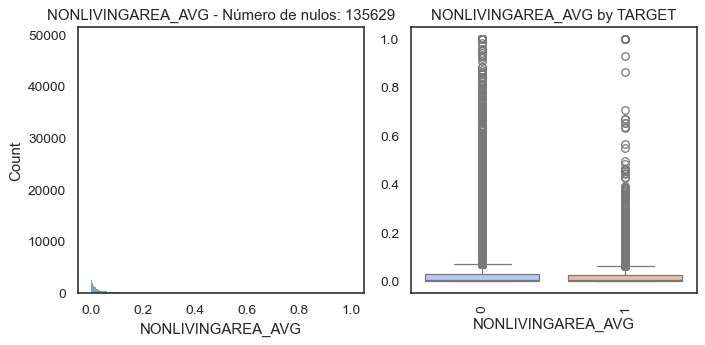

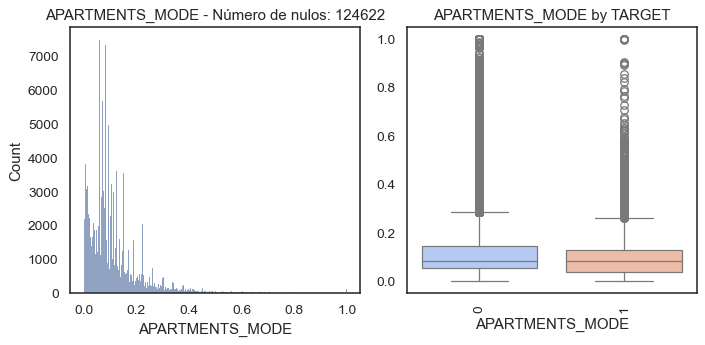

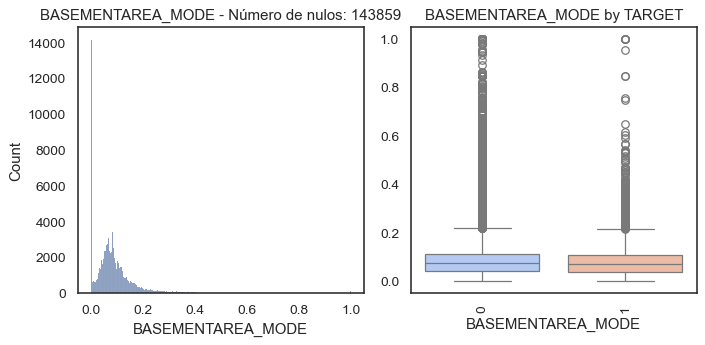

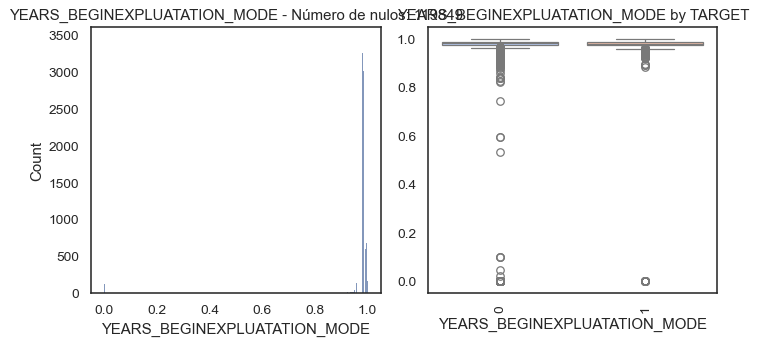

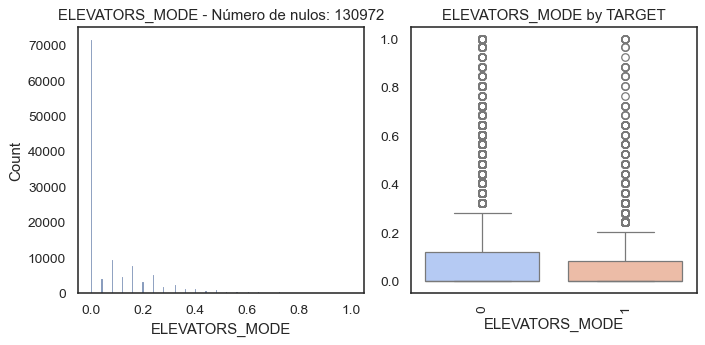

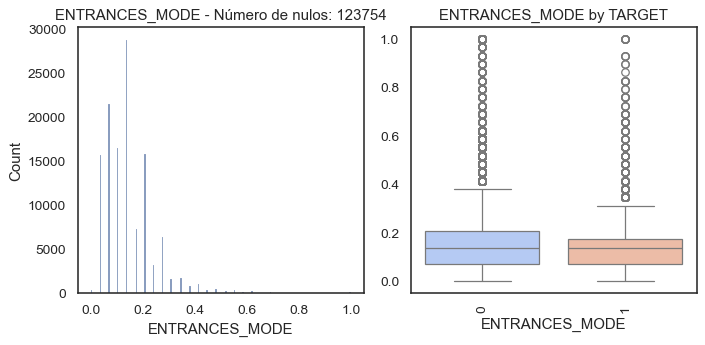

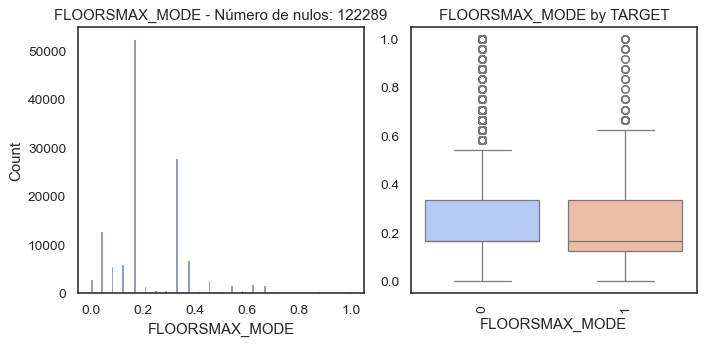

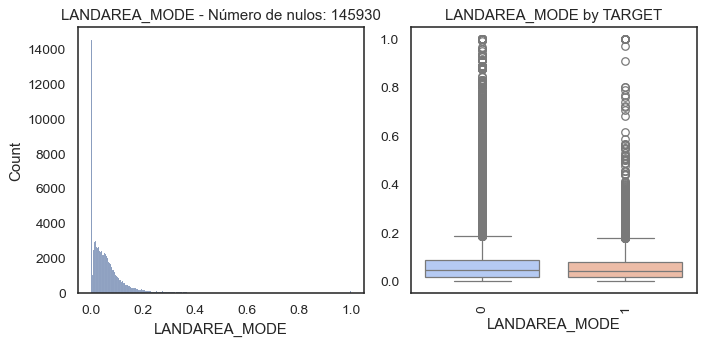

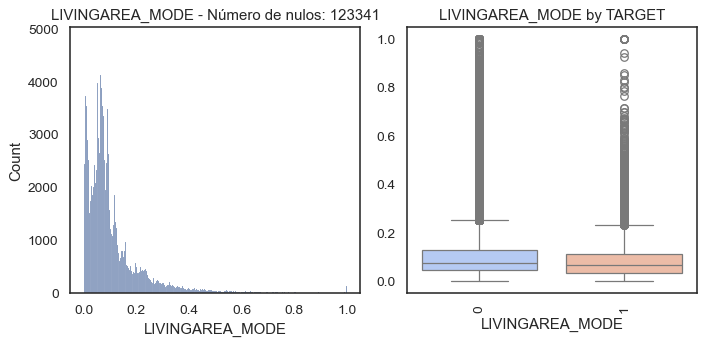

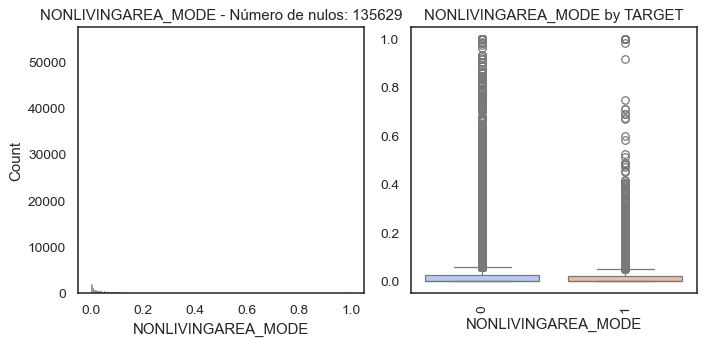

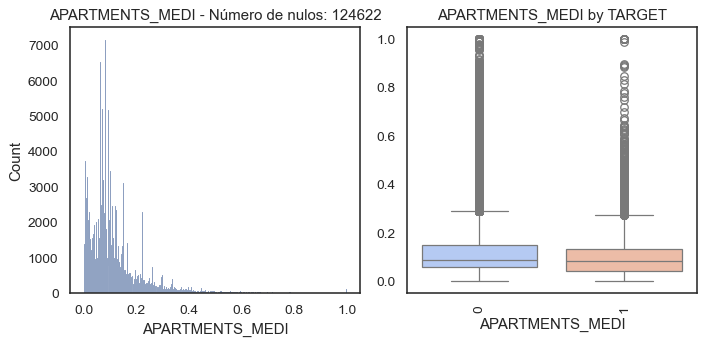

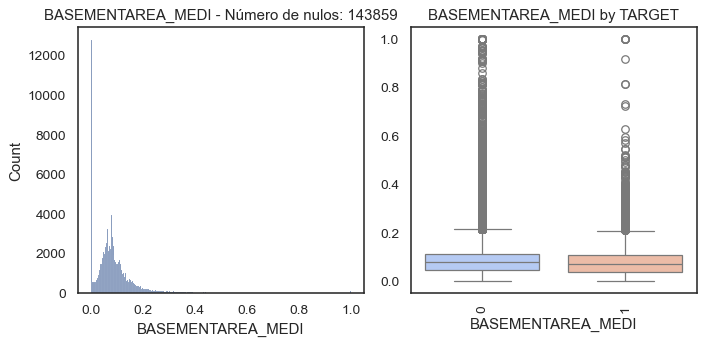

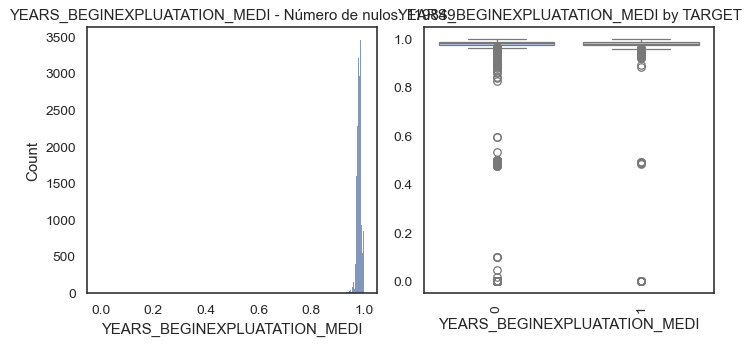

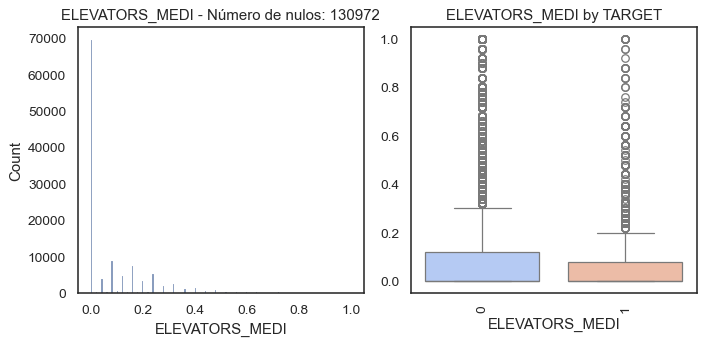

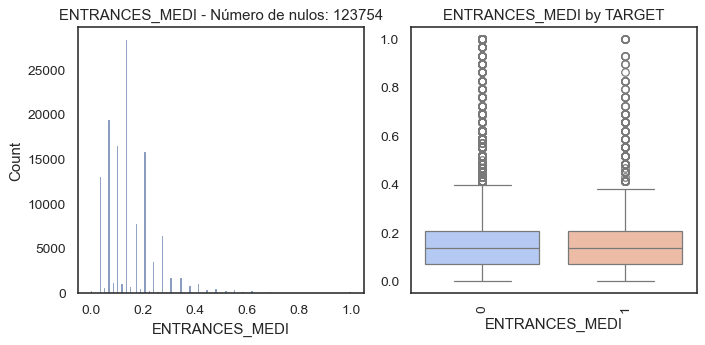

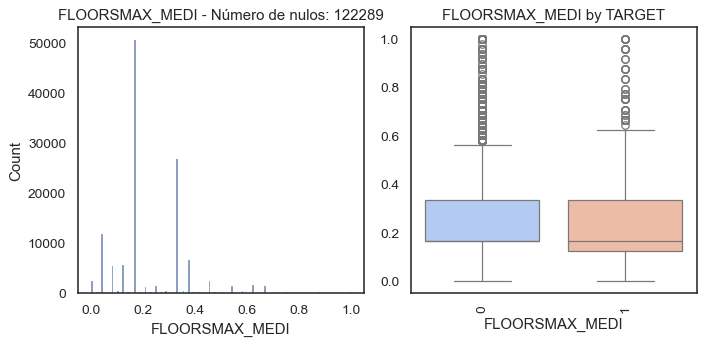

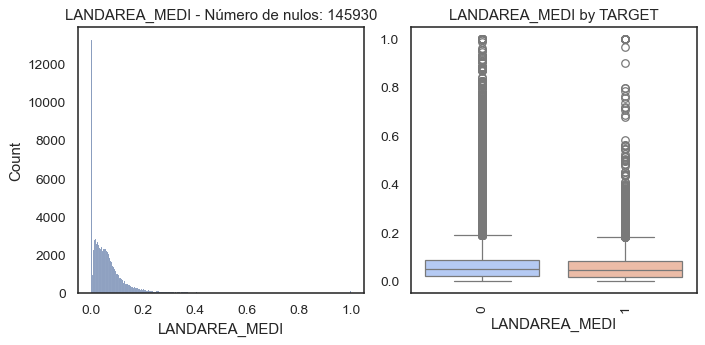

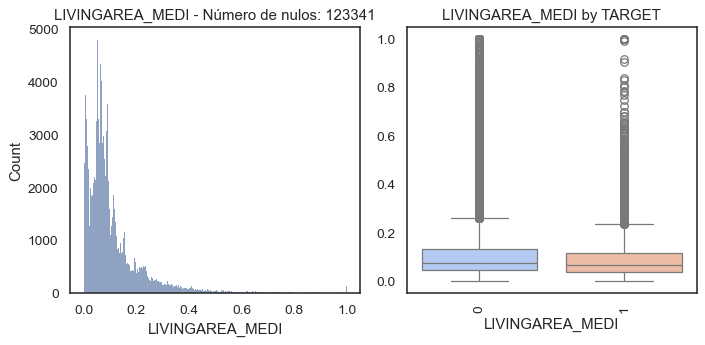

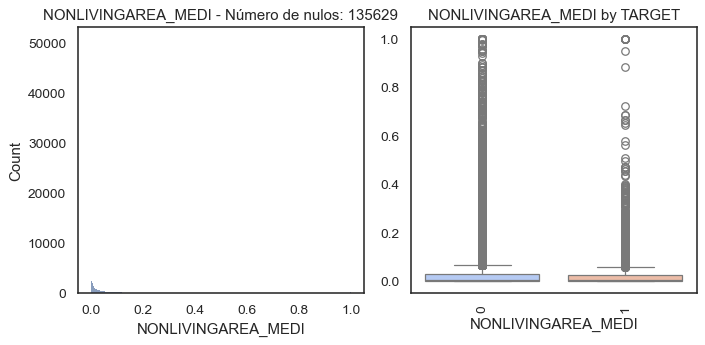

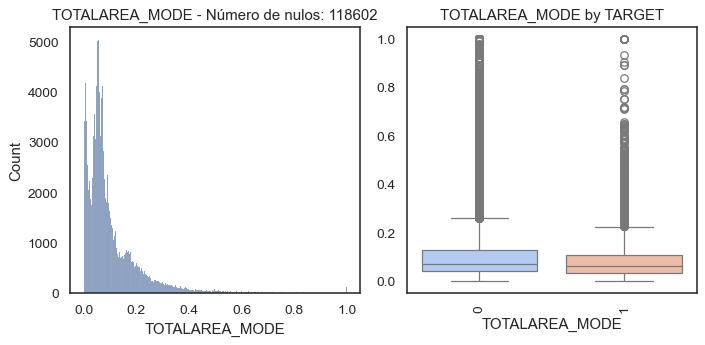

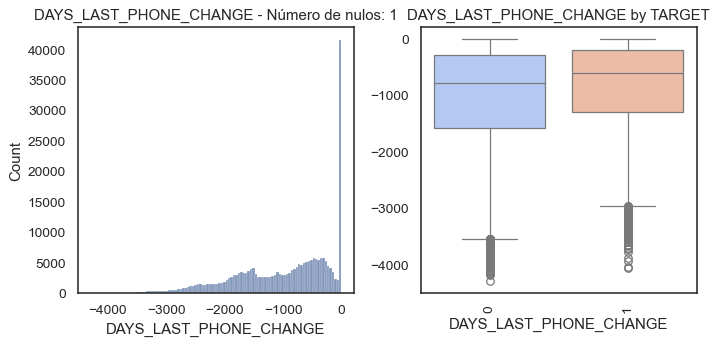

In [155]:
### Distribuación de las variables respecto al target
for i in columnas_continuas:
    if  i!='TARGET' and i!= 'SK_ID_CURR':
        plot_feature(df_loan_train, col_name=i, isContinuous=True, target='TARGET')
    
    plt.show()

# Tratamiento variables continuas

In [164]:
lista_continuas = [col for col in df_loan_train.columns if col not in lista_categoricas_definitivo]
lista_continuas.remove('SK_ID_CURR') ## elimino el ID 
print(lista_continuas)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_R

## 2.2. - Correlaciones

In [175]:
def get_deviation_of_mean_perc(pd_loan, list_var_continuous, target, multiplier):
    """
    Devuelve el porcentaje de valores que exceden del intervalo de confianza
    :type series:
    :param multiplier:
    :return:
    """
    pd_final = pd.DataFrame()
    
    for i in list_var_continuous:
        
        series_mean = pd_loan[i].mean()
        series_std = pd_loan[i].std()
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp
        size_s = pd_loan[i].size
        
        perc_goods = pd_loan[i][(pd_loan[i] >= left) & (pd_loan[i] <= right)].size/size_s
        perc_excess = pd_loan[i][(pd_loan[i] < left) | (pd_loan[i] > right)].size/size_s
        
        if perc_excess>0:    
            pd_concat_percent = pd.DataFrame(pd_loan[target][(pd_loan[i] < left) | (pd_loan[i] > right)]\
                                            .value_counts(normalize=True).reset_index()).T
            pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 
                                         pd_concat_percent.iloc[0,1]]
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = pd_loan[i][(pd_loan[i] < left) | (pd_loan[i] > right)].size
            pd_concat_percent['porcentaje_sum_null_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final


In [176]:
get_deviation_of_mean_perc(df_loan_train, lista_continuas, target='TARGET', multiplier=3)


0.0       1.0                      variable  sum_outlier_values  \
0   0.000000  1.000000                  CNT_CHILDREN                3424   
1   0.898657  0.101343                  CNT_CHILDREN                3424   
2   0.000000  1.000000              AMT_INCOME_TOTAL                 211   
3   0.938389  0.061611              AMT_INCOME_TOTAL                 211   
4   0.000000  1.000000                    AMT_CREDIT                2611   
5   0.957105  0.042895                    AMT_CREDIT                2611   
6   0.000000  1.000000                   AMT_ANNUITY                2351   
7   0.962994  0.037006                   AMT_ANNUITY                2351   
8   0.000000  1.000000               AMT_GOODS_PRICE                3327   
9   0.960325  0.039675               AMT_GOODS_PRICE                3327   
10  0.000000  1.000000    REGION_POPULATION_RELATIVE                6772   
11  0.959982  0.040018    REGION_POPULATION_RELATIVE                6772   
12  0.000000  1.000000             DAYS_REGISTRATION                 589   
13  0.962649  0.037351             DAYS_REGISTRATION                 589   
14  0.000000  1.000000                   OWN_CAR_AGE                2694   
15  0.913883  0.086117                   OWN_CAR_AGE                2694   
16  0.000000  1.000000               CNT_FAM_MEMBERS                3206   
17  0.899875  0.100125               CNT_FAM_MEMBERS                3206   
18  0.000000  1.000000       HOUR_APPR_PROCESS_START                 490   
19  0.893878  0.106122       HOUR_APPR_PROCESS_START                 490   
20  0.000000  1.000000                APARTMENTS_AVG                2363   
21  0.953026  0.046974                APARTMENTS_AVG                2363   
22  0.000000  1.000000              BASEMENTAREA_AVG                1584   
23  0.946970  0.053030              BASEMENTAREA_AVG                1584   
24  0.000000  1.000000   YEARS_BEGINEXPLUATATION_AVG                 567   
25  0.911817  0.088183   YEARS_BEGINEXPLUATATION_AVG                 567   
26  0.000000  1.000000                 ELEVATORS_AVG                1958   
27  0.957610  0.042390                 ELEVATORS_AVG                1958   
28  0.000000  1.000000                 ENTRANCES_AVG                1764   
29  0.940476  0.059524                 ENTRANCES_AVG                1764   
30  0.000000  1.000000                 FLOORSMAX_AVG                2132   
31  0.955910  0.044090                 FLOORSMAX_AVG                2132   
32  0.000000  1.000000                  LANDAREA_AVG                1630   
33  0.935583  0.064417                  LANDAREA_AVG                1630   
34  0.000000  1.000000                LIVINGAREA_AVG                2545   
35  0.953242  0.046758                LIVINGAREA_AVG                2545   
36  0.000000  1.000000             NONLIVINGAREA_AVG                1921   
37  0.947944  0.052056             NONLIVINGAREA_AVG                1921   
38  0.000000  1.000000               APARTMENTS_MODE                2418   
39  0.953267  0.046733               APARTMENTS_MODE                2418   
40  0.000000  1.000000             BASEMENTAREA_MODE                1657   
41  0.946892  0.053108             BASEMENTAREA_MODE                1657   
42  0.000000  1.000000  YEARS_BEGINEXPLUATATION_MODE                 555   
43  0.909910  0.090090  YEARS_BEGINEXPLUATATION_MODE                 555   
44  0.000000  1.000000                ELEVATORS_MODE                2713   
45  0.951714  0.048286                ELEVATORS_MODE                2713   
46  0.000000  1.000000                ENTRANCES_MODE                2087   
47  0.942501  0.057499                ENTRANCES_MODE                2087   
48  0.000000  1.000000                FLOORSMAX_MODE                2156   
49  0.957792  0.042208                FLOORSMAX_MODE                2156   
50  0.000000  1.000000                 LANDAREA_MODE                1688   
51  0.934834  0.065166                 LANDAREA_MODE     

In [161]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

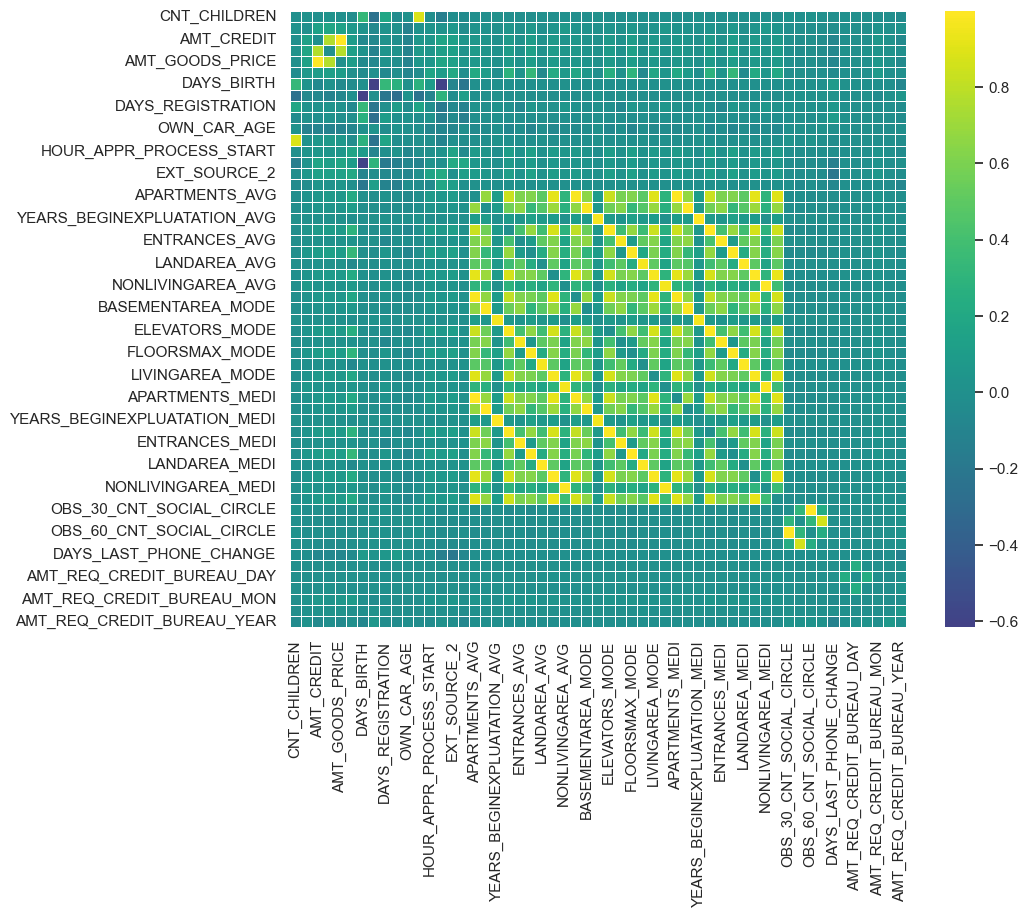

0

In [162]:
get_corr_matrix(dataset = df_loan_train[lista_continuas], 
                metodo='pearson', size_figure=[10,8])

In [163]:
corr = df_loan_train[lista_continuas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

level_0                       level_1  correlation
2574      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998369
2166                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997043
2110                ENTRANCES_MEDI                 ENTRANCES_AVG     0.996885
2054                ELEVATORS_MEDI                 ELEVATORS_AVG     0.996153
1886               APARTMENTS_MEDI                APARTMENTS_AVG     0.995391
2278               LIVINGAREA_MEDI                LIVINGAREA_AVG     0.995273
1942             BASEMENTAREA_MEDI              BASEMENTAREA_AVG     0.994524
1998  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993773
2334            NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG     0.991744
2222                 LANDAREA_MEDI                  LANDAREA_AVG     0.991016
2175                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988146
222                AMT_GOODS_PRICE                    AMT_CREDIT     0.987014
1671                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985640
2063                ELEVATORS_MEDI                ELEVATORS_MODE     0.983066
2119                ENTRANCES_MEDI                ENTRANCES_MODE     0.980530
2231                 LANDAREA_MEDI                 LANDAREA_MODE     0.980458
1559                ELEVATORS_MODE                 ELEVATORS_AVG     0.979046
1951             BASEMENTAREA_MEDI             BASEMENTAREA_MODE     0.978387
1895               APARTMENTS_MEDI               APARTMENTS_MODE     0.978019
1615                ENTRANCES_MODE                 ENTRANCES_AVG     0.977592
2343            NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE     0.975206
2287               LIVINGAREA_MEDI               LIVINGAREA_MODE     0.974669
1447             BASEMENTAREA_MODE              BASEMENTAREA_AVG     0.974195
1391               APARTMENTS_MODE                APARTMENTS_AVG     0.974160
1727                 LANDAREA_MODE                  LANDAREA_AVG     0.972939
1783               LIVINGAREA_MODE                LIVINGAREA_AVG     0.971851
1503  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.970858
1839            NONLIVINGAREA_MODE             NONLIVINGAREA_AVG     0.966758
2007  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.962254
2388                TOTALAREA_MODE                LIVINGAREA_AVG     0.924933
2406                TOTALAREA_MODE               LIVINGAREA_MEDI     0.919378
2289               LIVINGAREA_MEDI               APARTMENTS_MEDI     0.916138
1281                LIVINGAREA_AVG                APARTMENTS_AVG     0.913896
2271               LIVINGAREA_MEDI                APARTMENTS_AVG     0.912860
1893               APARTMENTS_MEDI                LIVINGAREA_AVG     0.912452
1785               LIVINGAREA_MODE               APARTMENTS_MODE     0.910847
2397                TOTALAREA_MODE               LIVINGAREA_MODE     0.899330
1902               APARTMENTS_MEDI               LIVINGAREA_MODE     0.896949
2280               LIVINGAREA_MEDI               APARTMENTS_MODE     0.895014
1776               LIVINGAREA_MODE                APARTMENTS_AVG     0.894636
2381                TOTALAREA_MODE                APARTMENTS_AVG     0.893191
1398               APARTMENTS_MODE                LIVINGAREA_AVG     0.891266
2399                TOTALAREA_MODE               APARTMENTS_MEDI     0.886734
605                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.879369
2292               LIVINGAREA_MEDI                ELEVATORS_MEDI     0.868893
1284                LIVINGAREA_AVG                 ELEVATORS_AVG     0.868234
2274               LIVINGAREA_MEDI                 ELEVATORS_AVG     0.866233
2058                ELEVATORS_MEDI                LIVINGAREA_AVG     0.866157
2390                TOTALAREA_MODE               APARTMENTS_MODE     0.863919
2630      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.858737
2283               LIVINGAREA_MEDI               

En el DataFrame presentado, se observa una fuerte correlación entre variables que comparten sufijos como _MODE, _AVG y _MEDI. Estas columnas representan diferentes formas de agregación o medición de características similares. Por ejemplo, variables como OBS_60_CNT_SOCIAL_CIRCLE y OBS_30_CNT_SOCIAL_CIRCLE o FLOORSMAX_MEDI y FLOORSMAX_AVG presentan correlaciones extremadamente altas, cercanas al 1.

Este nivel de redundancia dificulta la extracción de conclusiones claras, ya que las variables no aportan información verdaderamente independiente al análisis. Cuando múltiples variables contienen datos casi idénticos, es posible que los modelos predictivos o estadísticos asignen pesos similares a estas columnas, lo que puede llevar a problemas como multicolinealidad o sobreajuste.

Además, trabajar con estas variables sin una adecuada agrupación o reducción dimensional podría complicar la interpretación de los resultados y generar modelos más complejos de lo necesario. Por lo tanto, es esencial agrupar estas variables según sus sufijos (_MODE, _AVG, _MEDI) o seleccionar una representación representativa de cada grupo, para simplificar el análisis y evitar redundancias innecesarias.

In [167]:
# Paso 1: Listar las columnas que no terminan en _MODE, _AVG o _MEDI
suffixes = ['_MODE', '_AVG', '_MEDI']
variables_resto = [col for col in df_loan_train[lista_continuas].columns if not any(col.endswith(suffix) for suffix in suffixes)]
print(variables_resto)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [168]:
# Paso 2: Crear DataFrames separados para cada sufijo
mode_columns = [col for col in df_loan_train[lista_continuas].columns if col.endswith('_MODE')]
avg_columns = [col for col in df_loan_train[lista_continuas].columns if col.endswith('_AVG')]
medi_columns = [col for col in df_loan_train[lista_continuas].columns if col.endswith('_MEDI')]

# Crear un diccionario para almacenar los DataFrames con nombres específicos
dfs = {}

# Lista de sufijos y nombres correspondientes
df_names = ['df_mode', 'df_avg', 'df_medi']

# Crear los DataFrames combinando las variables restantes con las de cada sufijo
for name, suffix_columns in zip(df_names, [mode_columns, avg_columns, medi_columns]):
    varsi = variables_resto + suffix_columns  # Combinar las columnas sin sufijo con las del sufijo actual
    dfs[name] = df_loan_train[varsi]  # Guardar el DataFrame con el nombre específico

# Asignar los DataFrames a variables específicas
df_mode = dfs['df_mode']
df_avg = dfs['df_avg']
df_medi = dfs['df_medi']

# Verificar los DataFrames creados
print("DataFrame con '_MODE':", df_mode.head())
print("DataFrame con '_AVG':", df_avg.head())
print("DataFrame con '_MEDI':", df_medi.head())


DataFrame con '_MODE':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
102858             0          157500.0    659025.0      36927.0   
151160             0          261000.0   1237032.0      41013.0   
128625             0          157500.0    350415.0      26329.5   
51375              1          180000.0    269550.0      12001.5   
254925             0          247500.0   1800000.0      49630.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
102858         562500.0                    0.011703      -17211   
151160        1012500.0                    0.010032      -22909   
128625         292500.0                    0.022625      -21827   
51375          225000.0                    0.004960      -12273   
254925        1800000.0                    0.046220      -22108   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
102858          -3232            -9639.0             -754          NaN   
151160         365243  

In [169]:
corr = df_avg.corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

level_0                   level_1  correlation
664   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998369
146            AMT_GOODS_PRICE                AMT_CREDIT     0.987014
1251            LIVINGAREA_AVG            APARTMENTS_AVG     0.913896
396            CNT_FAM_MEMBERS              CNT_CHILDREN     0.879369
1254            LIVINGAREA_AVG             ELEVATORS_AVG     0.868234
701   DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.858737
1107             ELEVATORS_AVG            APARTMENTS_AVG     0.838596
147            AMT_GOODS_PRICE               AMT_ANNUITY     0.775248
110                AMT_ANNUITY                AMT_CREDIT     0.770104
1252            LIVINGAREA_AVG          BASEMENTAREA_AVG     0.693659
1182             FLOORSMAX_AVG             ELEVATORS_AVG     0.680154
1035          BASEMENTAREA_AVG            APARTMENTS_AVG     0.679976
1144             ENTRANCES_AVG          BASEMENTAREA_AVG     0.650453
1256            LIVINGAREA_AVG             FLOORSMAX_AVG     0.630824
1179             FLOORSMAX_AVG            APARTMENTS_AVG     0.619411
1255            LIVINGAREA_AVG             ENTRANCES_AVG     0.618187
258              DAYS_EMPLOYED                DAYS_BIRTH     0.615414
1143             ENTRANCES_AVG            APARTMENTS_AVG     0.610308
474               EXT_SOURCE_1                DAYS_BIRTH     0.601451

 Implicaciones para el Análisis:
Redundancia de Información:

Las variables con correlaciones extremadamente altas (> 0.9) probablemente estén duplicando información, y en el contexto de modelado, esto podría causar problemas como multicolinealidad.
Selección de Variables:

Podría ser útil seleccionar una variable representativa de cada grupo altamente correlacionado para simplificar los modelos sin perder información.
Modelos Predictivos:

Variables como AMT_GOODS_PRICE, AMT_CREDIT y AMT_ANNUITY, que están altamente relacionadas, podrían necesitar estandarización para evitar sesgos en los coeficientes del modelo.

## 2.3. - Trataminedo nulos

In [130]:
get_percent_null_values_target(df_loan_train, continuas, target='loan_status')


NameError: name 'get_percent_null_values_target' is not defined